In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# os.getcwd()
os.chdir('/home/david/Desktop/projects/thesis/')

individual_signals_path = './downstream_classification/data/individual-signals/'

In [2]:
individual_signals = os.listdir(individual_signals_path)
print('Num Signals:', len(individual_signals))
individual_signals[:10]

Num Signals: 408733


['120994.npy',
 '142376.npy',
 '523733.npy',
 '223886.npy',
 '466227.npy',
 '229782.npy',
 '303487.npy',
 '253256.npy',
 '24689.npy',
 '483926.npy']

### Get names

In [8]:
signals = []
for x in ['447748.png',
 '432271.png', '441018.png', '409163.png', '418122.png', '442574.png', '425109.png', '400417.png', '407323.png', '401696.png',
   '420634.png', '428366.png', '415464.png', '414664.png', '422225.png', '425911.png', '422959.png', '442565.png', '422898.png', 
   '417322.png', '423692.png', '428834.png', '433337.png', '442486.png', '441045.png', '429828.png', '444523.png', '402592.png', 
   '441215.png', '417635.png', '420821.png', '449643.png', '419665.png', '405746.png', '443187.png', '445513.png', '424626.png', 
   '432711.png', '417952.png', '422496.png', '443324.png', '415085.png', '444449.png', '418577.png', '401859.png', '422659.png', 
   '419604.png', '422579.png', '436657.png', '415137.png', '428926.png', '408852.png', '416649.png', '446553.png', '419552.png',
   '410967.png', '436392.png', '418279.png', '444202.png', '414308.png', '417417.png', '416099.png', '421438.png', '424047.png', 
   '408786.png', '403500.png', '406357.png', '445209.png', '407965.png', '430194.png', '448806.png', '407718.png', '419576.png',
   '426910.png', '410932.png', '449065.png', '443242.png', '435003.png', '419900.png', '440851.png', '437326.png', '439105.png', 
   '433876.png', '436311.png', '439520.png', '440329.png', '411011.png', '448224.png', '423312.png', '434641.png', '431469.png',
    '408178.png', '439241.png', '426229.png', '443269.png', '441068.png', '412889.png', '413029.png', '422189.png', '444740.png']:
    signals.append(x.split('.')[0])
# signals

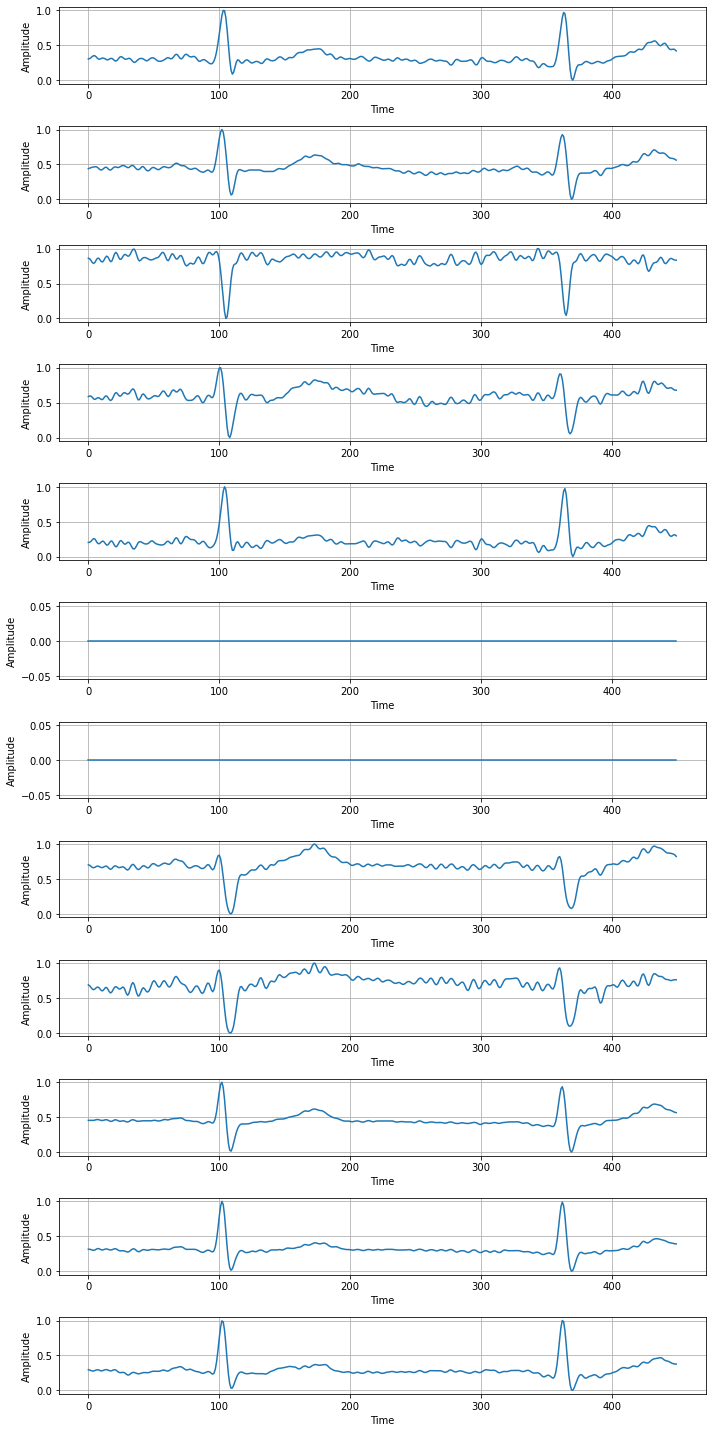

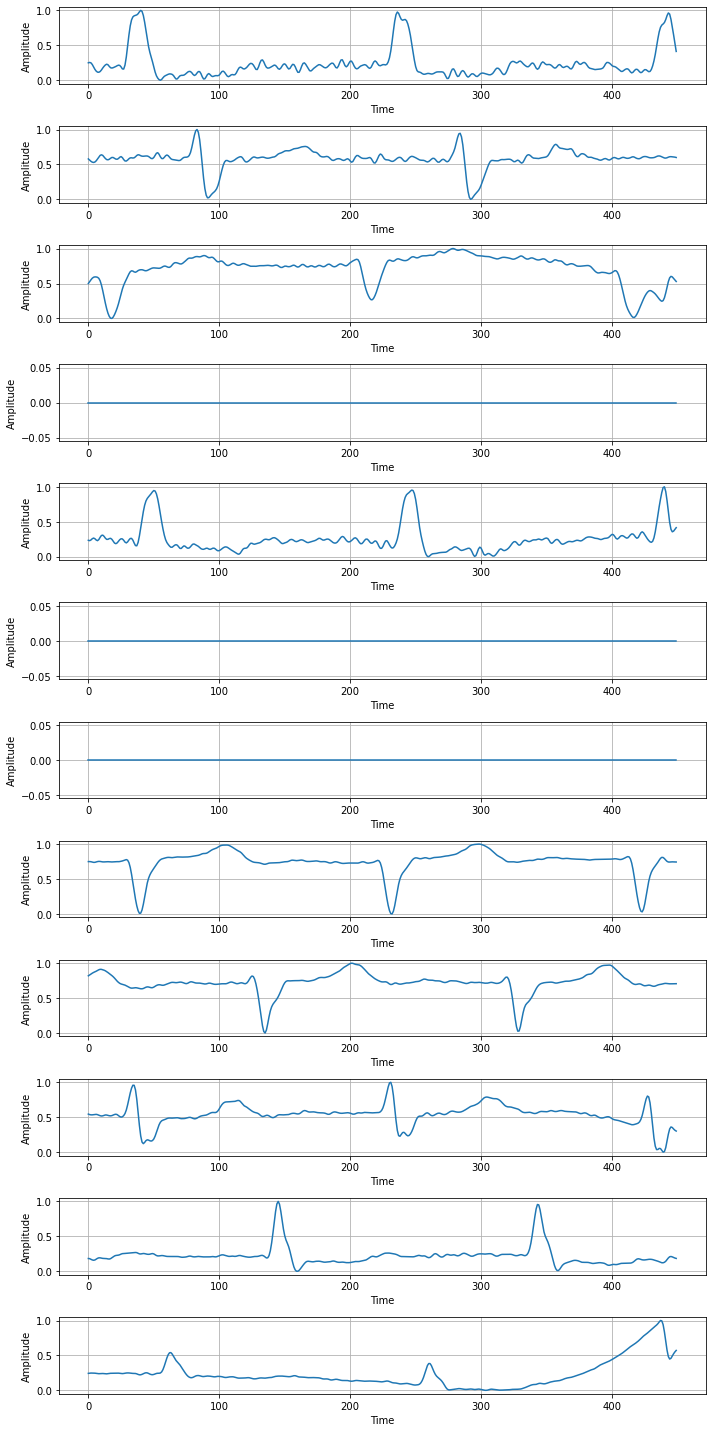

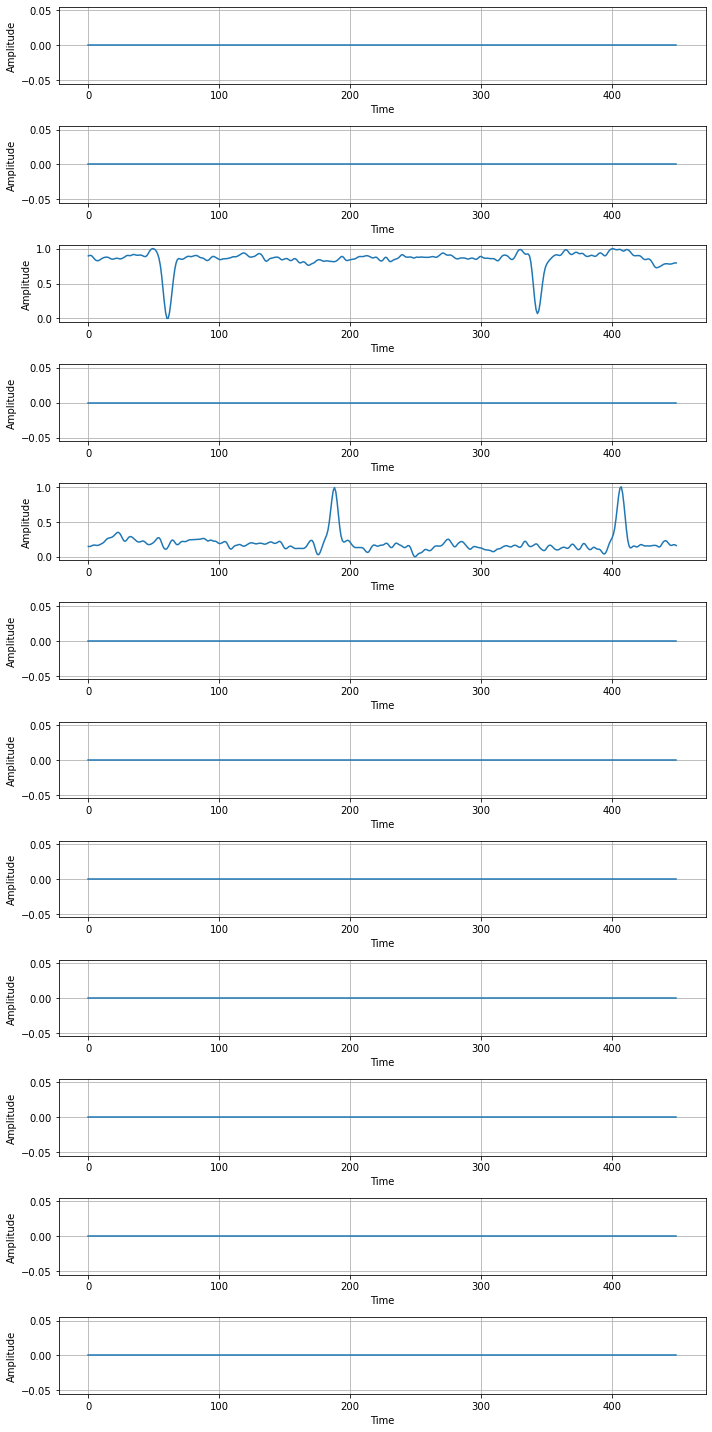

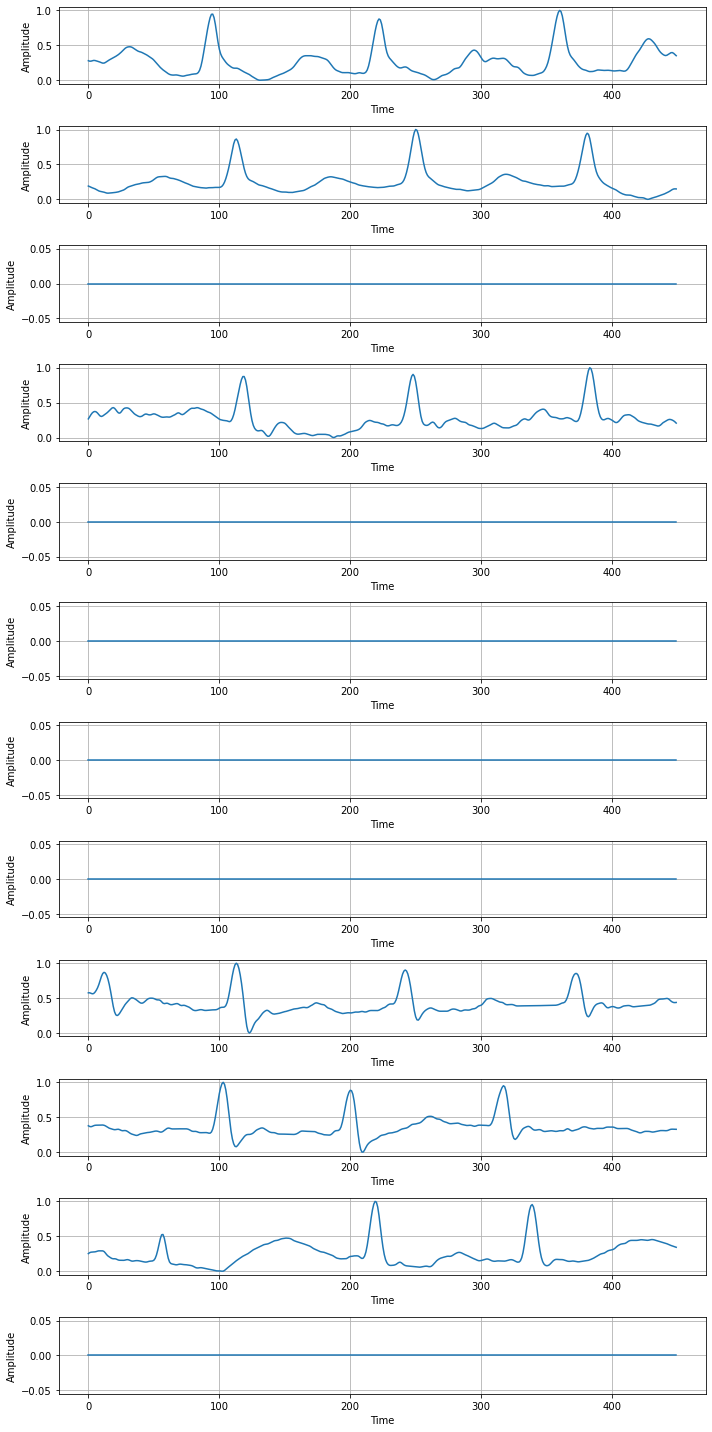

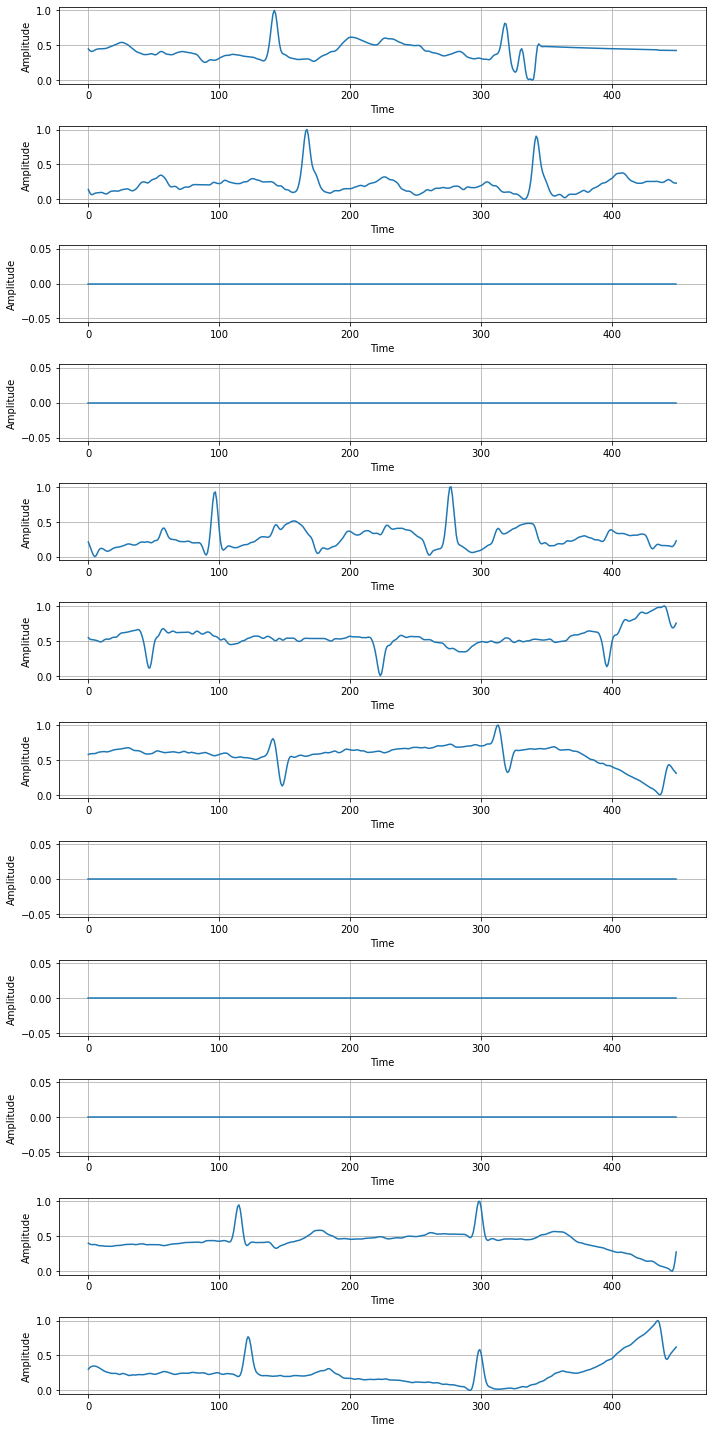

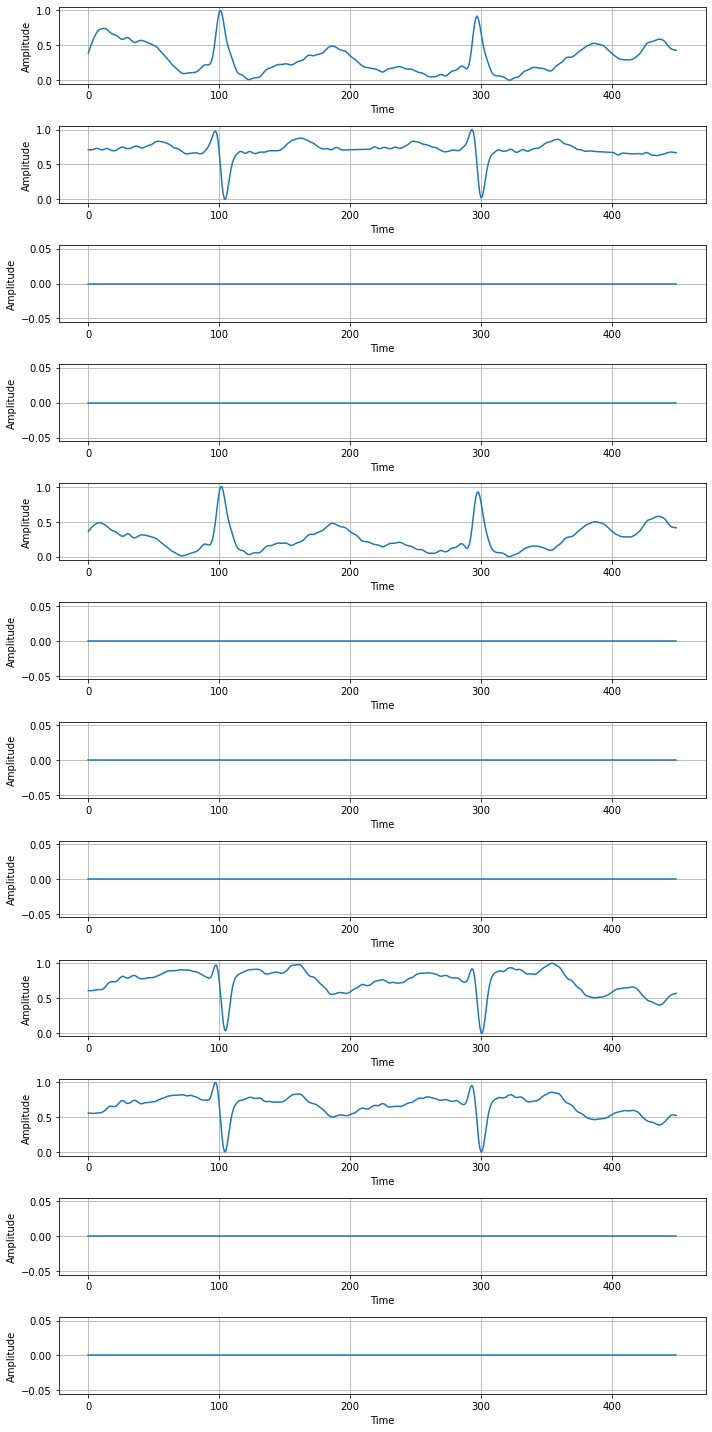

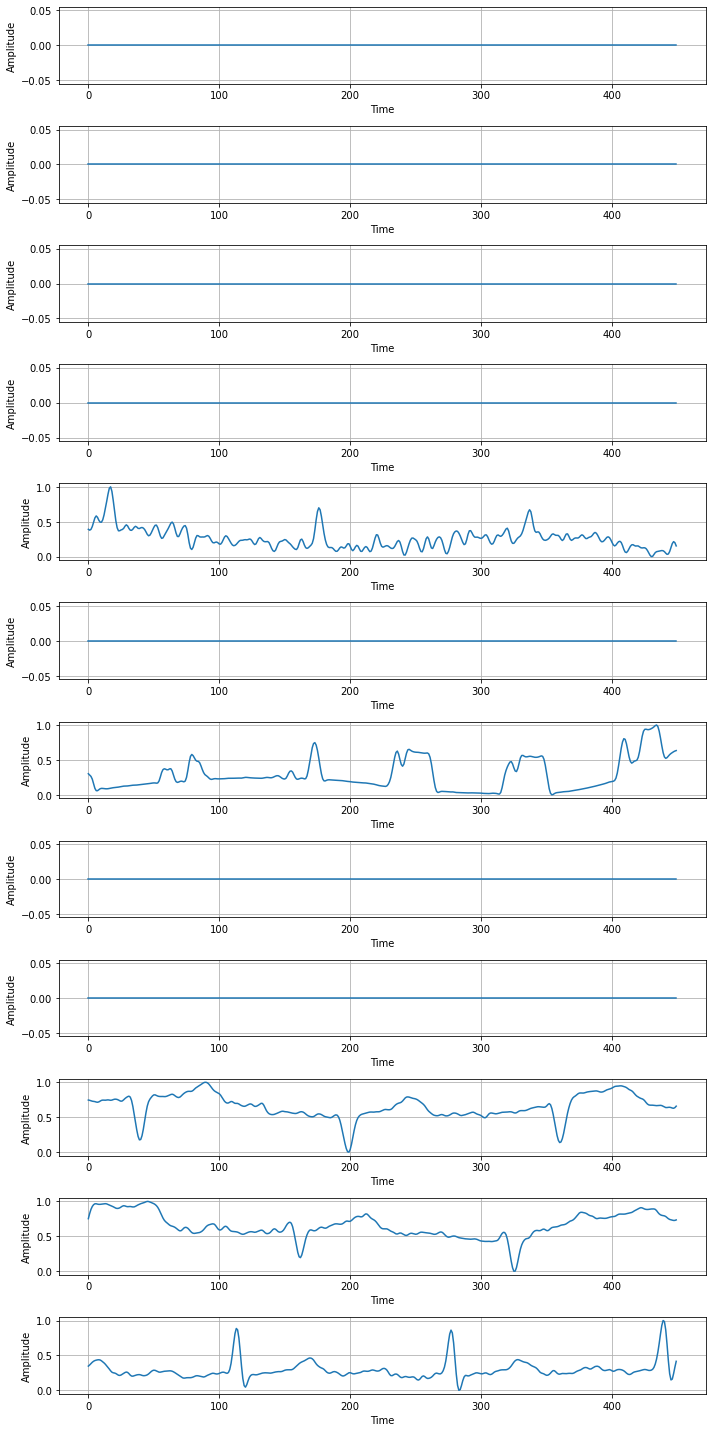

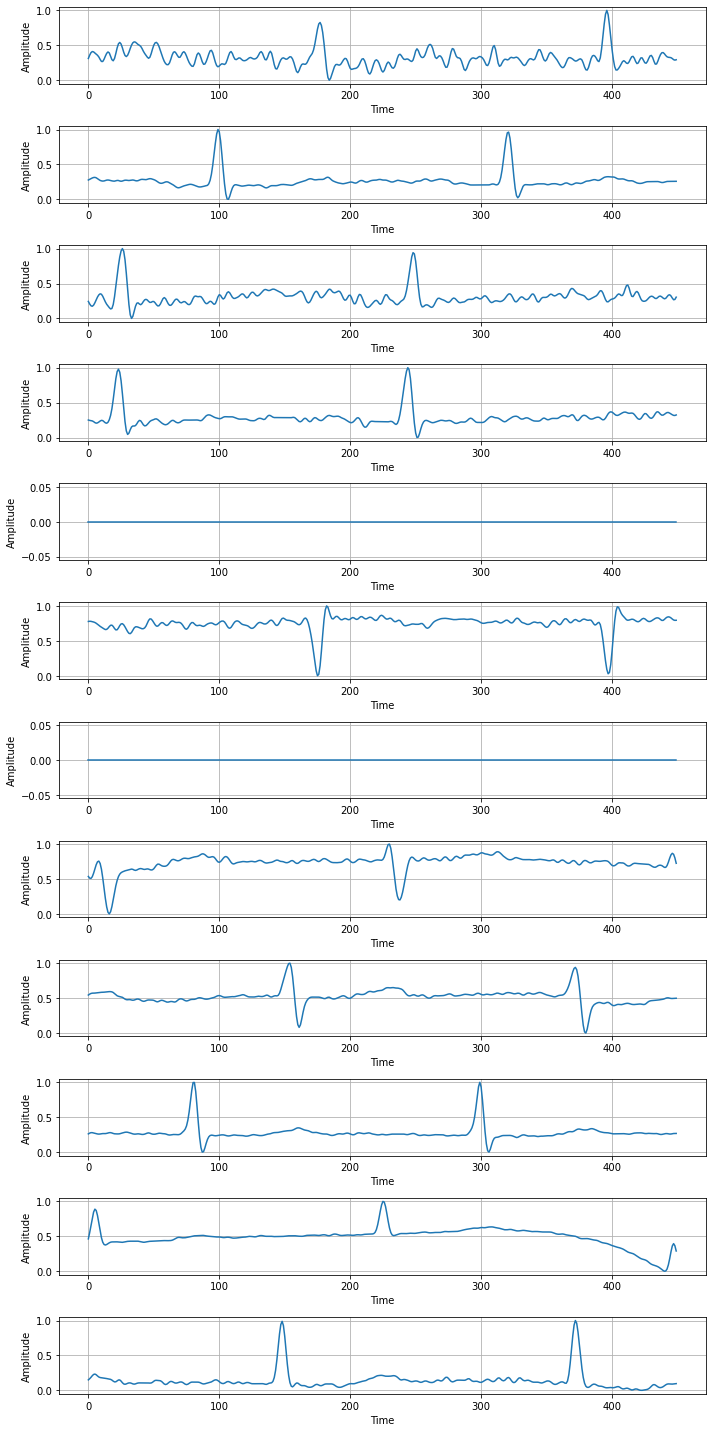

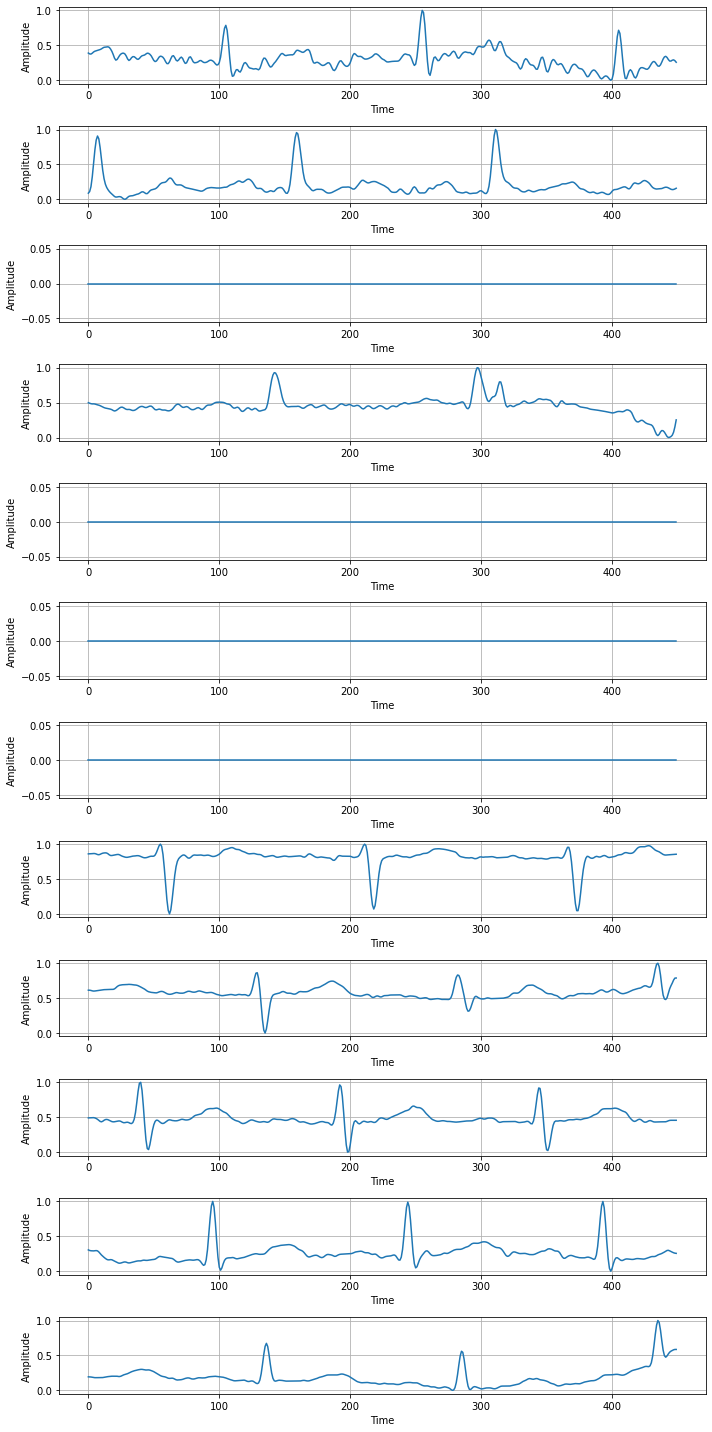

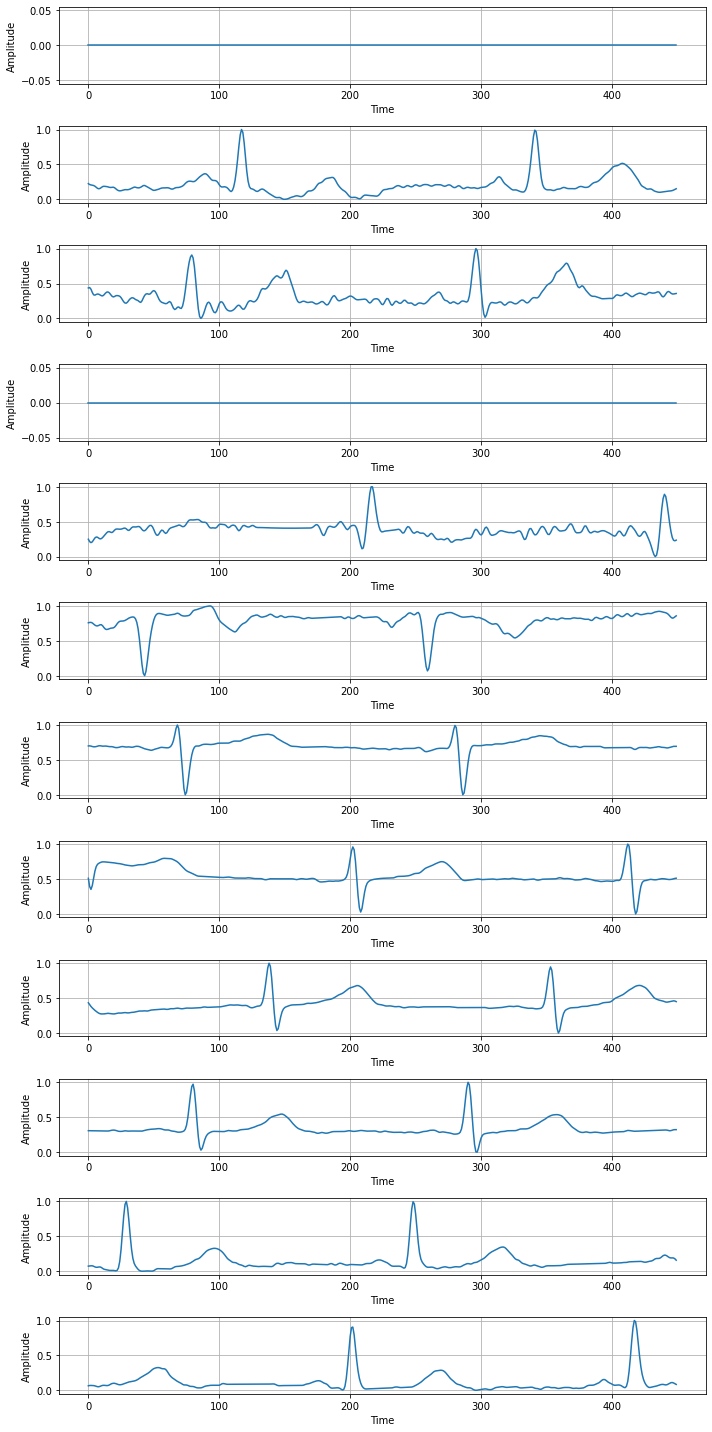

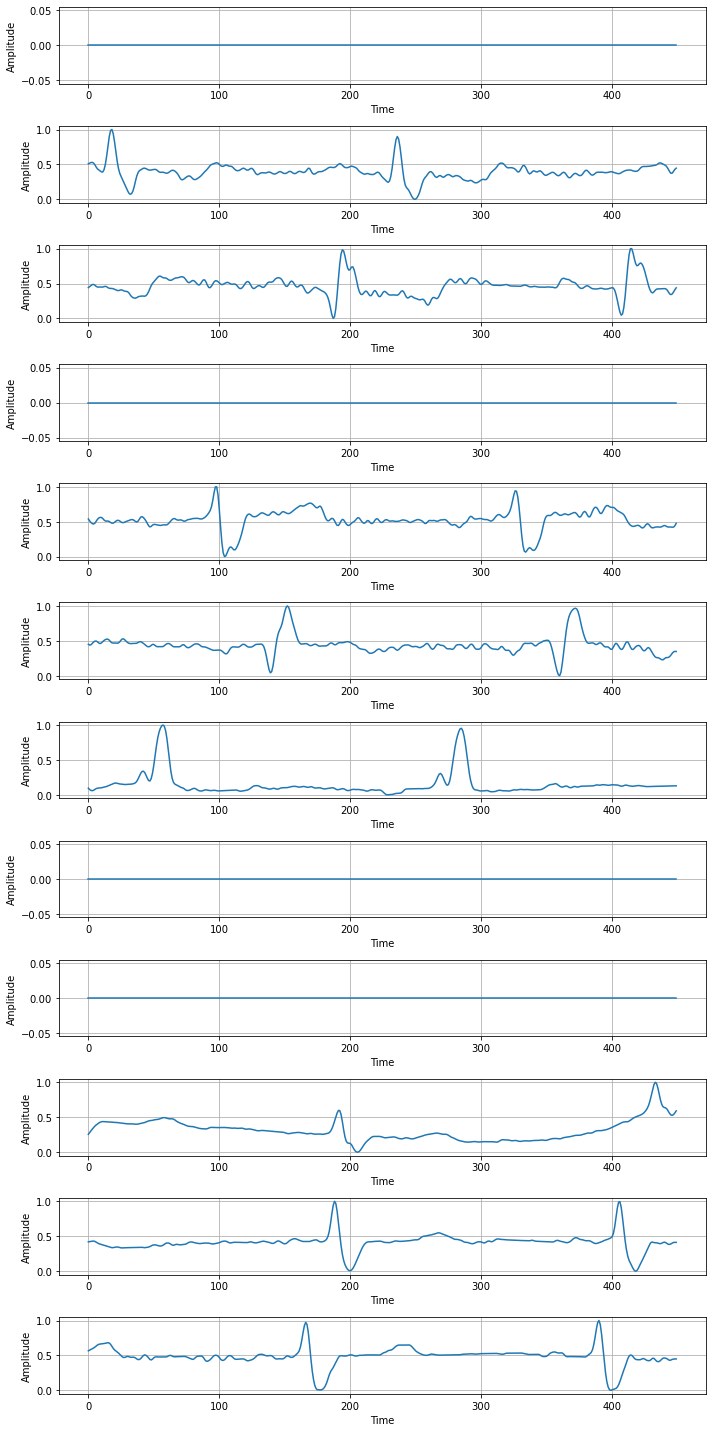

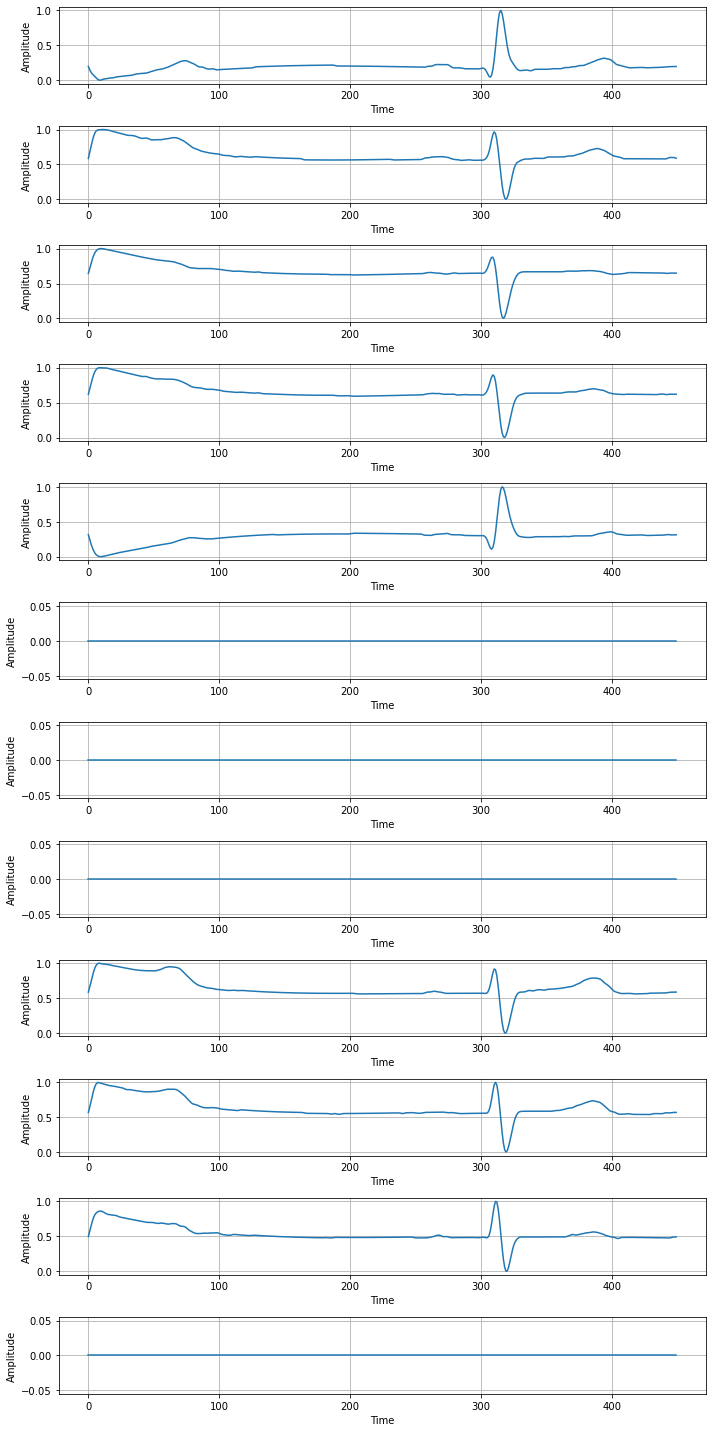

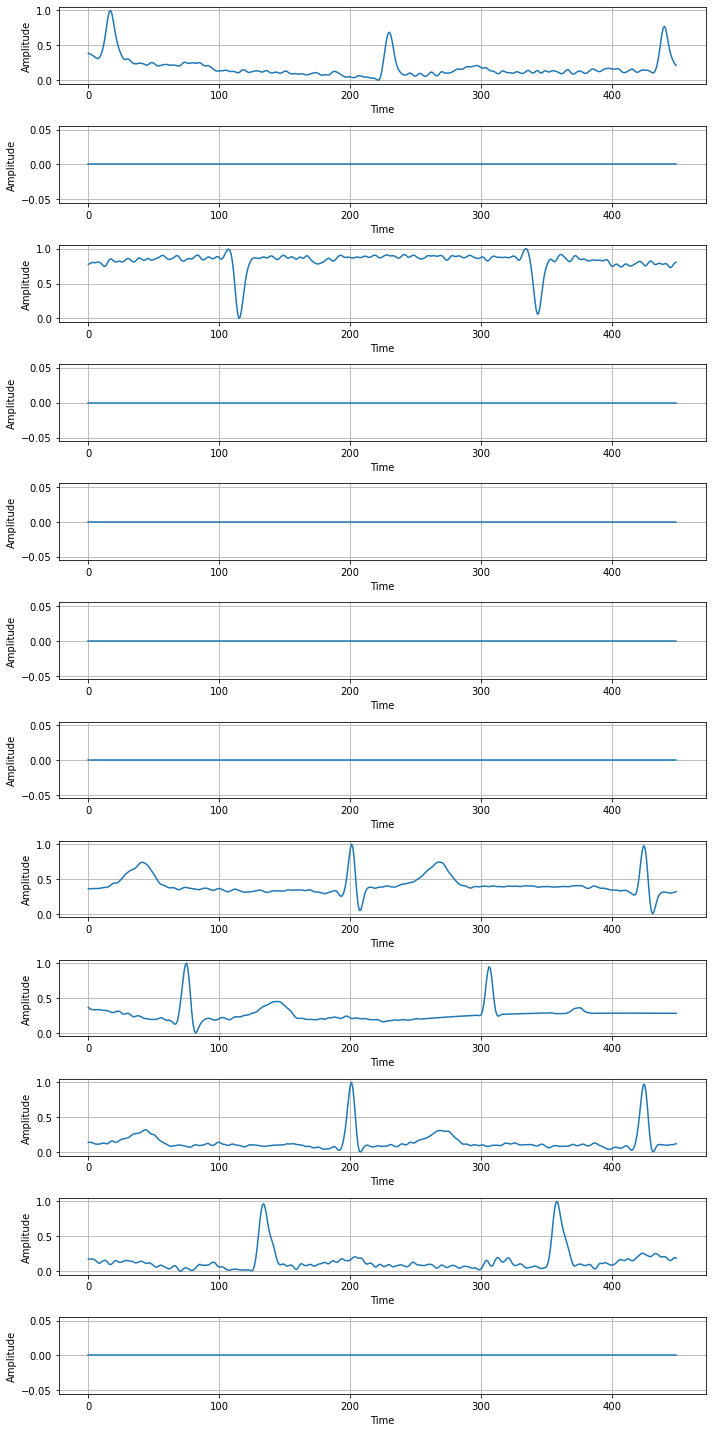

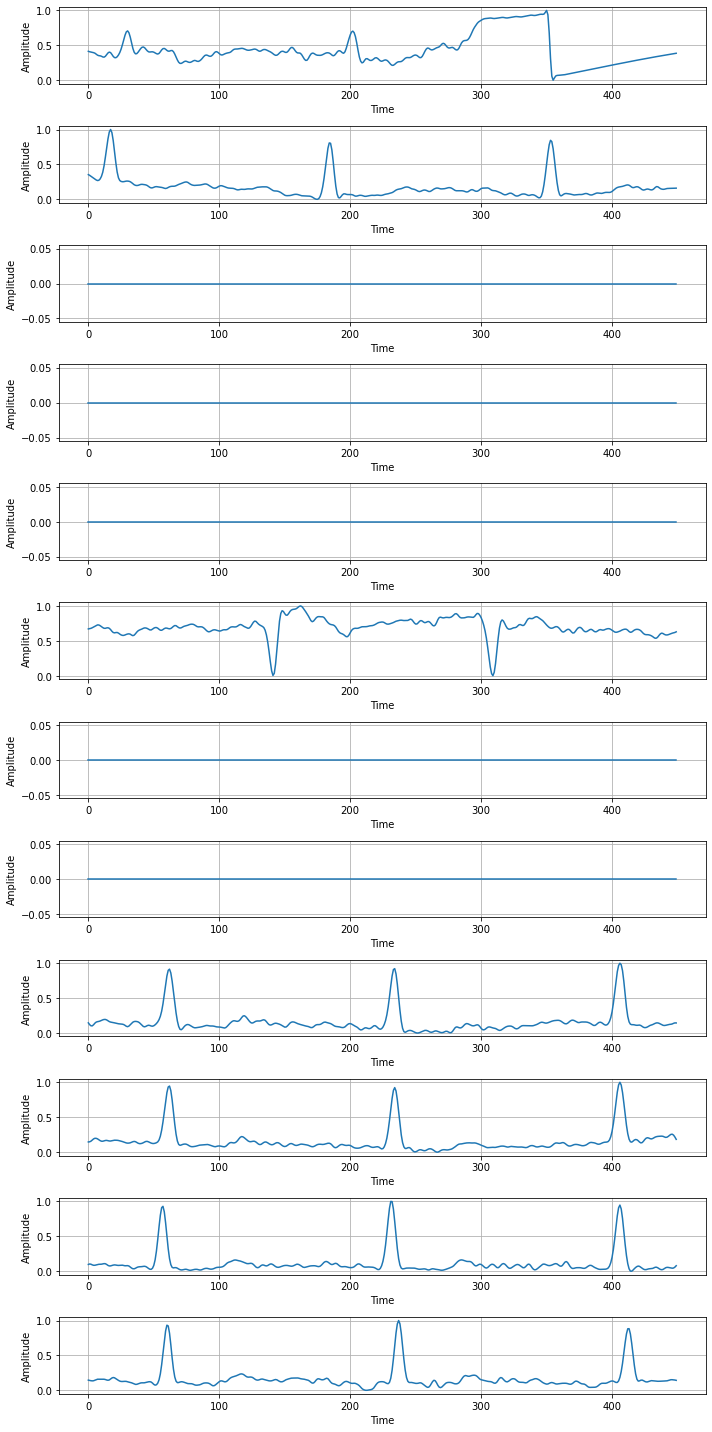

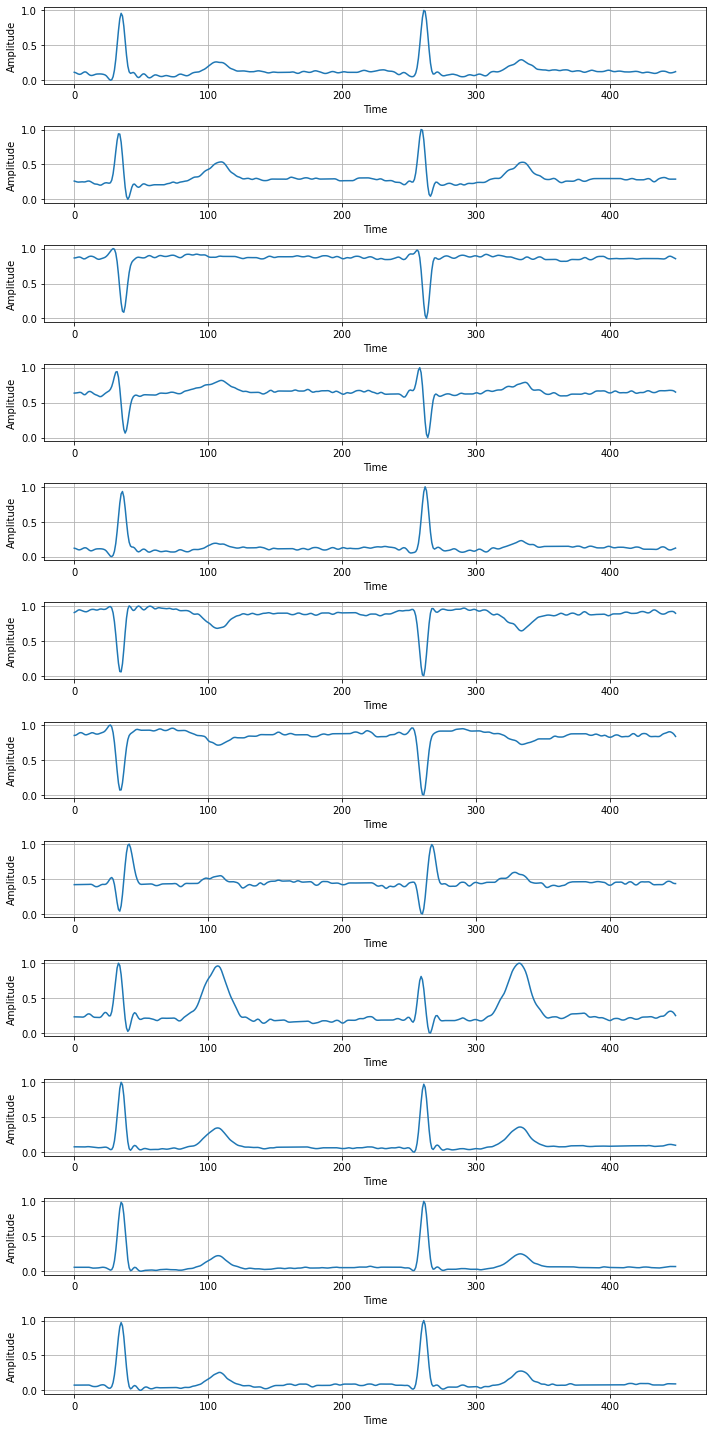

In [9]:
num_signals = 12

for signal_name in signals[:15]:
    try:
        signal = np.load(individual_signals_path+f'/{signal_name}.npy')
        signal_filled = np.nan_to_num(signal, nan = 0)
    except:
        print(f'Signal {signal_name} was not found.')
        continue
    fig, axes = plt.subplots(num_signals, 1, figsize=(10, 20))  # Adjust figure size as needed

    for i in range(num_signals):
        axes[i].plot(signal_filled[i])
        axes[i].set_xlabel("Time")
        axes[i].set_ylabel("Amplitude")
        axes[i].grid(True)

    plt.tight_layout()
    
    print('\n\n\n')


# Find First Peak

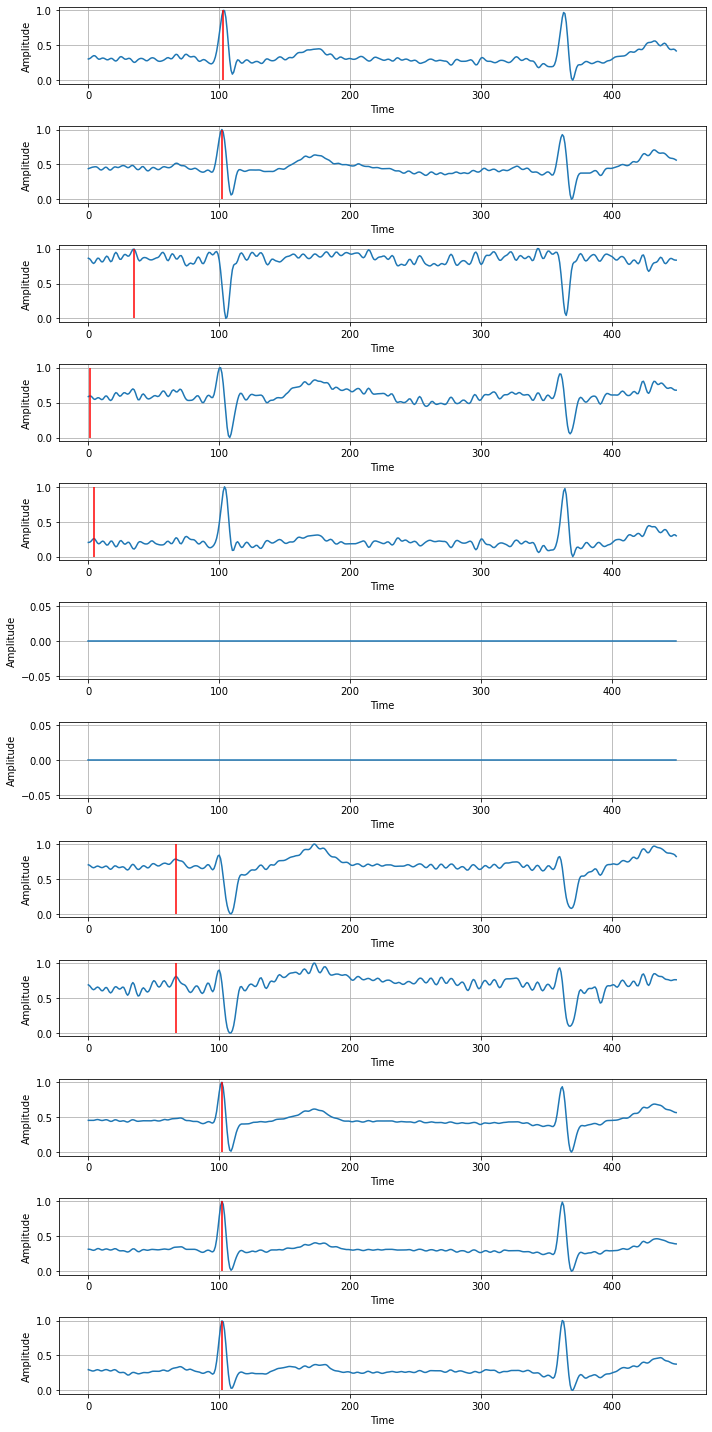

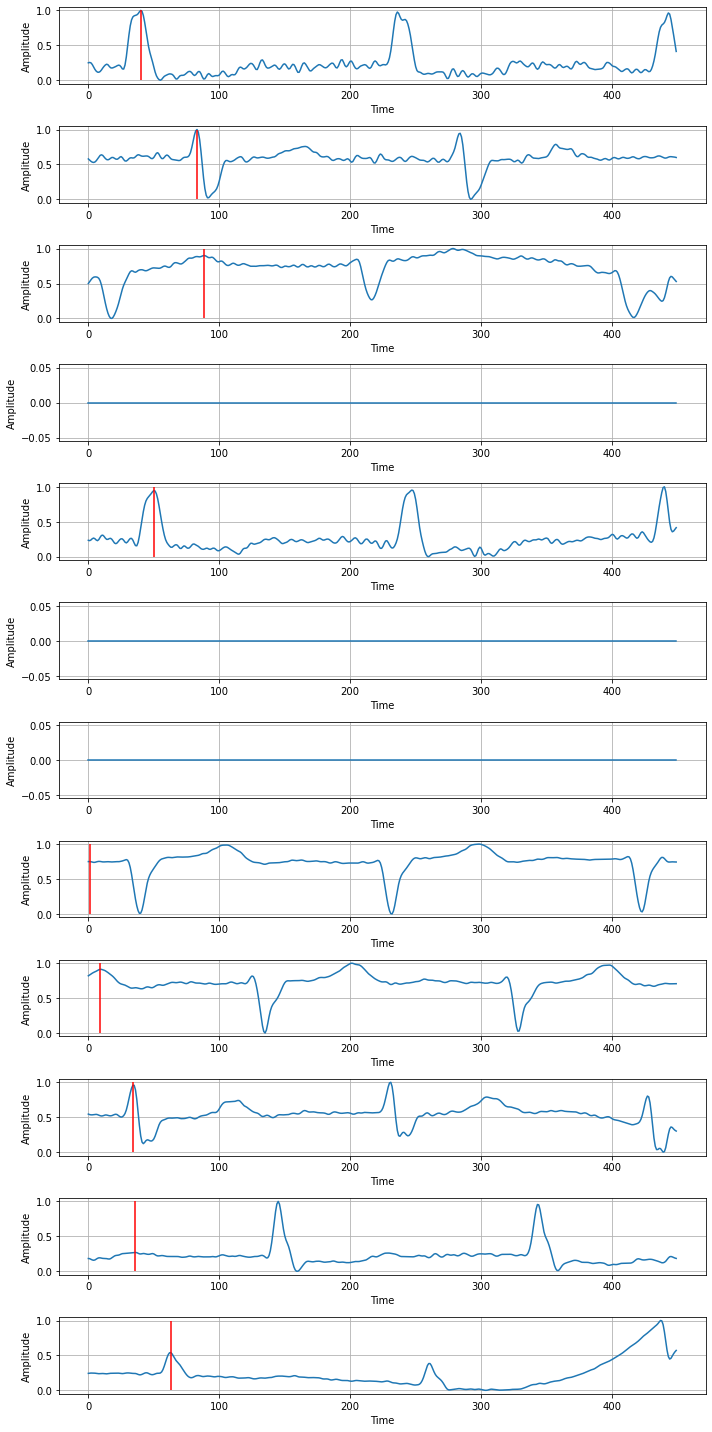

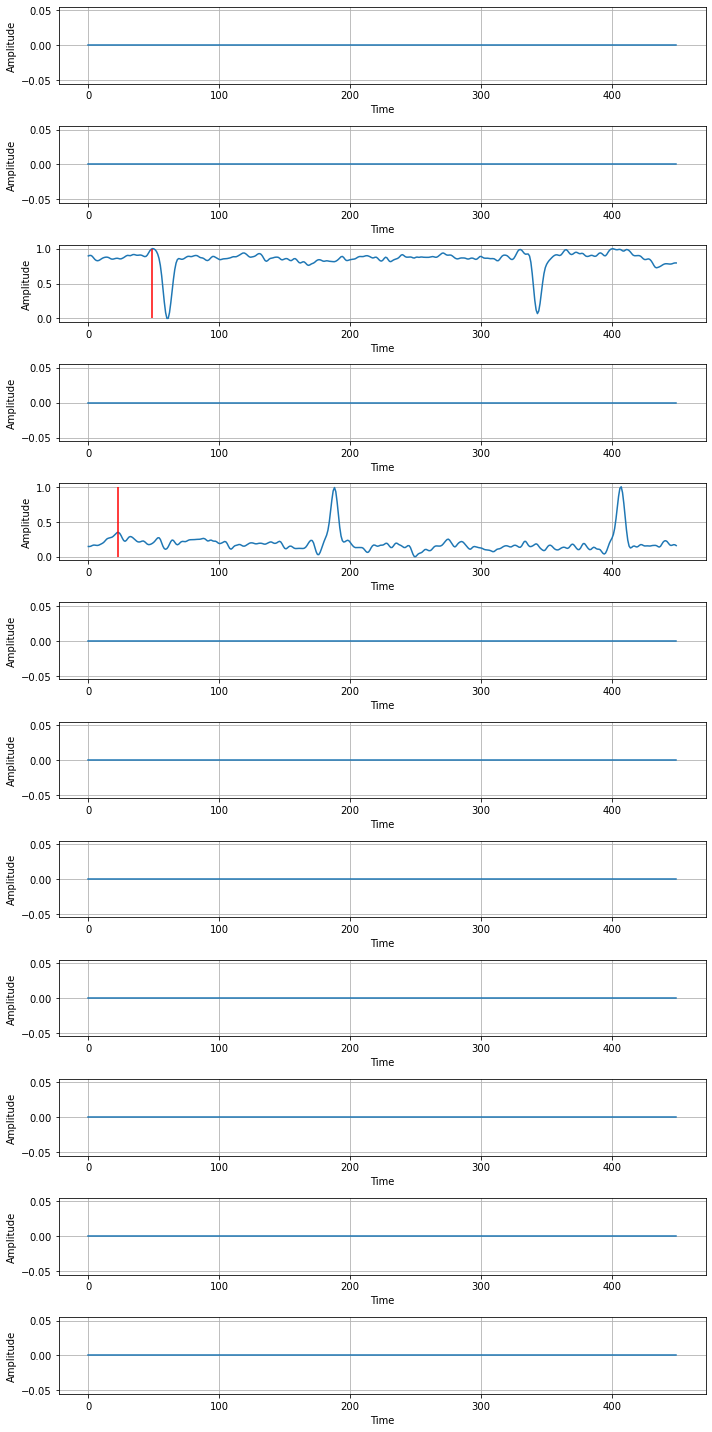

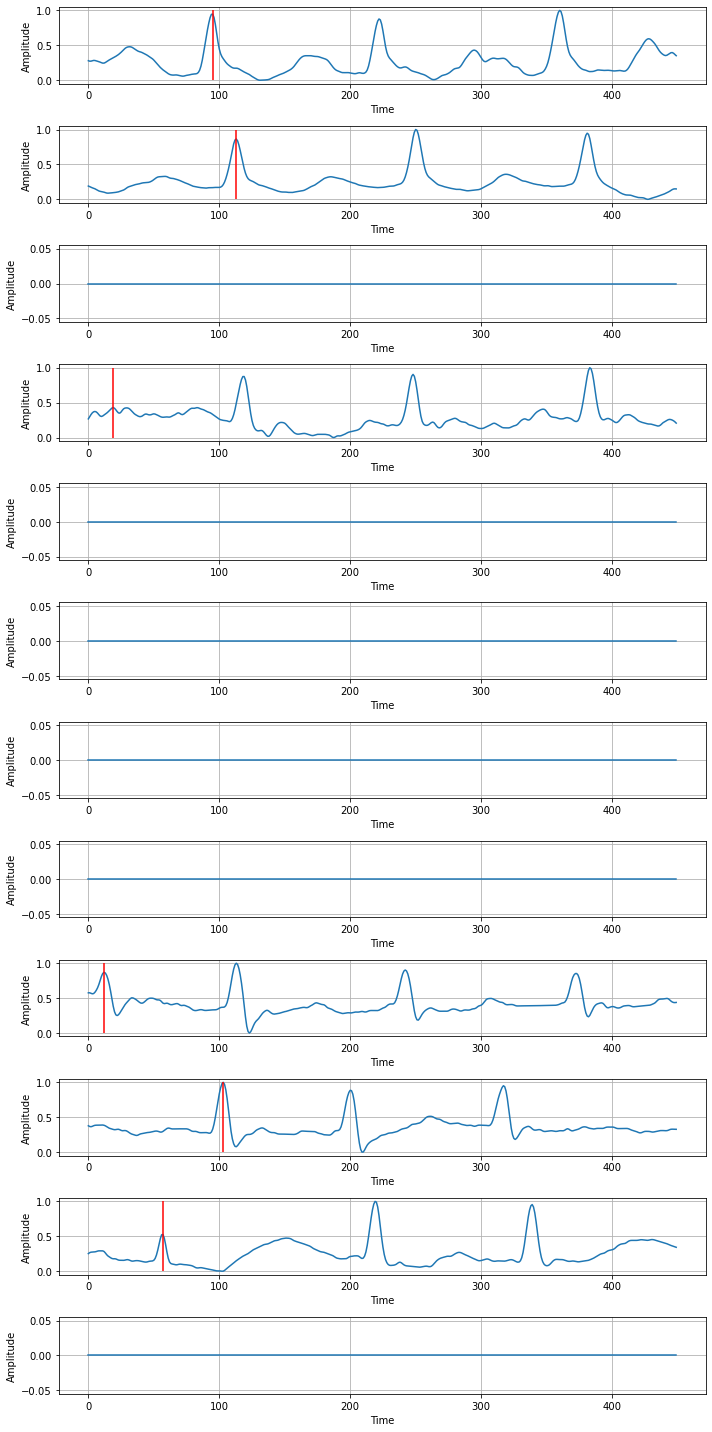

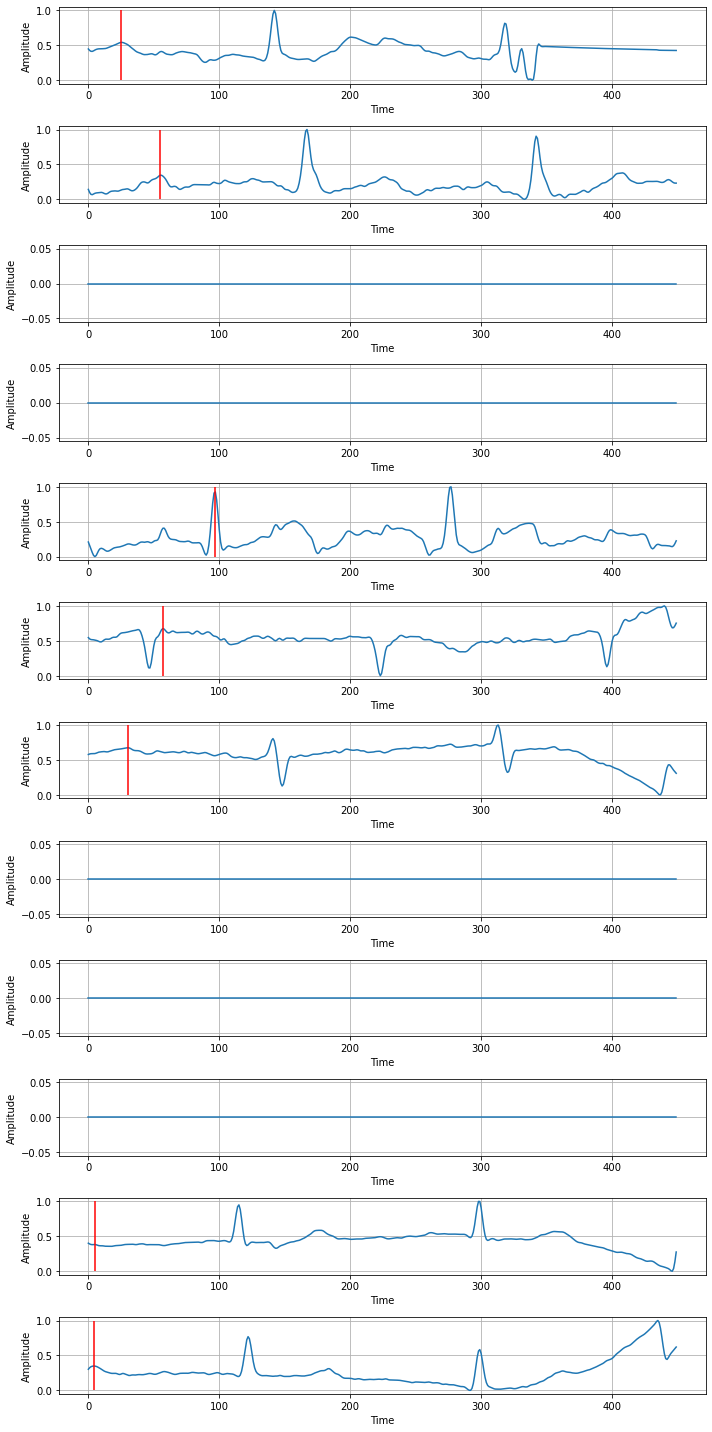

In [10]:
num_signals = 12
from scipy.signal import find_peaks

def detect_first_r_peak(ecg_signal):
    peaks, _ = find_peaks(ecg_signal, distance=100)  # adjust distance based on your signal characteristics
    if len(peaks) > 0:
        return peaks[0]
    else:
        return None

for signal_name in signals[:5]:
    try:
        signal = np.load(individual_signals_path+f'/{signal_name}.npy')
        signal_filled = np.nan_to_num(signal, nan = 0)
    except:
        print(f'Signal {signal_name} was not found.')
        continue
    fig, axes = plt.subplots(num_signals, 1, figsize=(10, 20))  # Adjust figure size as needed

    for i in range(num_signals):
        axes[i].plot(signal_filled[i])
        first_peak_index = detect_first_r_peak(signal_filled[i])
        if first_peak_index is not None:
            axes[i].vlines(x=first_peak_index, ymin= 0, ymax = 1, color='r')

        axes[i].set_xlabel("Time")
        axes[i].set_ylabel("Amplitude")
        axes[i].grid(True)

    plt.tight_layout()
    
    print('\n\n\n')


# Using Our Method

In [5]:
# Load packages
import numpy as np
from numpy.random import seed
seed(1)

import pandas as pd
import copy

import matplotlib.pyplot as plt
import math
import os
from sklearn import preprocessing
from sklearn.utils import shuffle

# Data manipulations
import numpy as np
import pandas as pd
from copy import copy

# Visualizations
import matplotlib
from matplotlib.patches import Patch
import seaborn as sns
import os
from os import listdir
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
import heartpy.filtering as hp
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import scipy.signal as signal

from statistics import median
import statistics
import random




# Set options and load file
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from tqdm import tqdm
from sklearn.model_selection import train_test_split

# Set options and load file
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def extract_start(s):
    res = find_R_temp(signal = s, Rdiff = 50, R_indices = R_finder(s, show=False), show = False, t=3, intervals = False)
    return res[0]



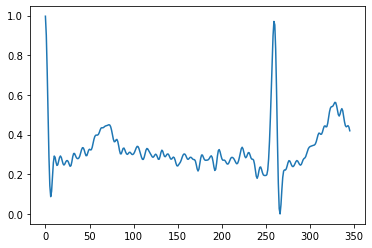

In [14]:
for signal_name in signals[:1]:
    try:
        signal = np.load(individual_signals_path+f'/{signal_name}.npy')
        signal_filled = np.nan_to_num(signal, nan = 0)
    except:
        print(f'Signal {signal_name} was not found.')
        continue
    for jj in range(len(signal_filled)):
        sig = signal_filled[jj]
        plt.plot(sig[extract_start(sig):])
        plt.show()
        break

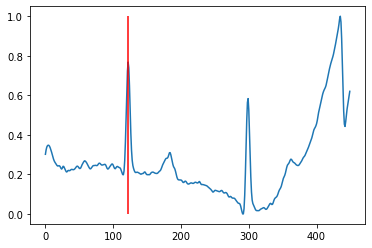

In [35]:
signal = np.load(individual_signals_path+f'/{signals[4]}.npy')
signal_filled = np.nan_to_num(signal, nan = 0)
sig = signal_filled[11]
plt.plot(sig)
try:
    plt.vlines(x=extract_start(sig),ymin=0,ymax=1, color='r')
except:
    pass
plt.show()

In [ ]:
for j in range(15545,15555):
    s = j
    print(s)
    sig = X_train.values[s]
    print('Intervals: ', R_finder(sig))
    print('Location: ', extract_start(sig))
    plt.plot(sig[extract_start(sig):])
    plt.show()


for signal_name in signals[:5]:
    try:
        signal = np.load(individual_signals_path+f'/{signal_name}.npy')
        signal_filled = np.nan_to_num(signal, nan = 0)
    except:
        print(f'Signal {signal_name} was not found.')
        continue
    fig, axes = plt.subplots(num_signals, 1, figsize=(10, 20))  # Adjust figure size as needed

    for i in range(num_signals):
        axes[i].plot(signal_filled[i])

        sig = signal_filled[i]
        # first_peak_index = detect_first_r_peak(signal_filled[i])
        # if first_peak_index is not None:
        #     axes[i].vlines(x=first_peak_index, ymin= 0, ymax = 1, color='r')

        axes[i].set_xlabel("Time")
        axes[i].set_ylabel("Amplitude")
        axes[i].grid(True)

    plt.tight_layout()
    
    print('\n\n\n')


In [3]:
def plot2(a,b, title_a = 'Original', title_b = 'Edited', limits = []):
    """
    Convenient way to compare two graphs.
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
    ax1.plot(a)
    ax1.set_title(title_a)
    ax2.plot(b)
    ax2.set_title(title_b)
    
    for xc in limits:
        ax1.axvline(x=xc, ls='--')
        ax2.axvline(x=xc, ls='--')
    
    plt.tight_layout()
    plt.show()
    
def MAD(T, k, t, q = 0.6745, show = True):
    """
    This is an implementation of the simple MAD anomalies classifier from 
    Outlier Detection in Weight Time Series of Connected Scales.
    
    Inputs:
    T - a time series of length T
    k - size of the moving average 
    t - trashold
    
    Outputs:
    anomalies
    """
    anomalies = np.zeros_like(T)
    
    for j in range(0+k,len(T)-k+1):
        # compute the MAD index for the j'th example
        window = T[j-k:j+k]
        Xj = T[j]
        med = median(window)
        MADj = median(abs(window - med))
        
        Mj = abs((q*(Xj - med))/MADj)
        
        if Mj > t:
            anomalies[j] = 1
    
    if show == True:
        plot2(T,anomalies)
    else:
        return anomalies

def LocalDiff(T, k, t, show = True, trim = False):
    """
    In the spirit of the local MAD classifier, this classifier also detect anomalities.
    The MAD did find where the peaks are, but because the part we first want to remove 
    is too far from remined an ECG signal, a more coerce measures are to be defined.
    This function calculate the difference between the minimum and the maximum of the 
    function in a given window.
    Recomendation: run it with different windows untile convergence.
    
    Inputs:
    T - a time series of length T
    k - size of the moving average 
    t - trashold
    
    Outputs:
    filtered signal - instead of triming out the anomalities parts, I enter the mean. 
        entering the mean does not change the low-pass filters.
    """
    
    T = T.reshape(len(T))
    anomalies = np.zeros_like(T)
    T = T/np.max(T)
    
    for j in range(0+k,len(T)-k+1):
        # compute the MAD index for the j'th example
        window = T[j-k:j+k]
        
        if (np.max(window) - np.min(window)).astype(np.float32) > t:
            anomalies[j-k:j+k] = 1
        
    npc = np.concatenate([T.reshape((len(T),1)),\
                          anomalies.reshape((len(anomalies),1))], \
                           axis = 1)
    df = pd.DataFrame(data = npc, columns = ['A','B'])
    df['B'] = [int(elem) for elem in df['B']]
    df.reset_index(inplace = True)
    
    if show == True:
        
        fix, ax = plt.subplots()
        ax.plot(df['A'])
        
        cmap = matplotlib.cm.get_cmap('Set3')

        for c in df['B'].unique():
            bounds = df[['index', 'B']].groupby('B').agg(['min', 'max']).loc[c]
            ax.axvspan(bounds.min(), bounds.max()+1, alpha=0.3, color=cmap.colors[c])
        
        labels = ['Normal Hearbeat', 'Anomaly Candidate']
        
        legend = [Patch(facecolor=cmap.colors[c], label=labels[c]) for c in df['B'].unique()]
        ax.legend(handles=legend)
        plt.xlim([df['index'].min(), df['index'].max()])
        plt.show()

    if trim == True:
        T[anomalies == 1.0] = np.mean(T[anomalies == 0.0])
        return T

"""
`remove_baseline_wander` is using a Notch filter. Based on [Lenis](https://www.hindawi.com/journals/cmmm/2017/9295029/)
and [Yuang, Dong and Lu (2018)](https://pubmed.ncbi.nlm.nih.gov/29378580/), it seems that Butterworth filter is more 
accurate.

"""    
def remove_baseline_wander_elastic(data, sample_rate, cutoff=0.05, filtype = 'lowpass'):
    '''removes baseline wander

    Function that uses a Butterworth filter to remove baseline
    wander from (especially) ECG signals

    Parameters
    ----------
    data : 1-dimensional numpy array or list 
        Sequence containing the to be filtered data

    sample_rate : int or float
        the sample rate with which the passed data sequence was sampled

    cutoff : int, float 
        the cutoff frequency of the Notch filter. We recommend 0.05Hz.
        default : 0.05
        
    filtype: str
        The type of filter to use. Available:
        - lowpass : a lowpass butterworth filter
        - highpass : a highpass butterworth filter
        - bandpass : a bandpass butterworth filter
        - notch : a notch filter around specified frequency range
        both the highpass and notch filter are useful for removing baseline wander. The notch
        filter is especially useful for removing baseling wander in ECG signals.

    Returns
    -------
    out : 1d array
        1d array containing the filtered data

    Examples
    --------
    >>> import heartpy as hp
    >>> data, _ = hp.load_exampledata(0)

    baseline wander is removed by calling the function and specifying
    the data and sample rate.

    >>> filtered = remove_baseline_wander(data, 100.0)
    '''
    return hp.filter_signal(data = data, cutoff = cutoff, sample_rate = sample_rate,
                         filtertype=filtype)

"""
Define different distance metrics so we could tell the right R waves apart from the wrong ones.
"""

# Gaussian Kernel for the edges
def kernel(distances):
    kernel_width = 5
    weights = np.exp(-(distances**2)/kernel_width) # Compute an array of weights however you want
    return distances

def avgkernel(distances):
    kernel_width = 5
    weights = 1/30 # Compute an array of weights however you want
    return distances


"""
find R temp finds the location of the R waves in a wave.
"""

def find_R_temp(signal, k = 40, t = 3, Rdiff = 100, show = True, one_graph = True, R_indices = None, sig_num = "", \
                intervals = True, limits = []):
    if len(signal) == 0:
        return []
    
    if sum(signal) == 0:
        return []
   
    # Normalize between [0, 1]
    signal = signal / np.max(signal)
    
    # Remove T peaks if needed
    signal2 = signal.copy()
    signal2 = signal2.reshape((len(signal),))
    signal2 = remove_baseline_wander_elastic(signal2, 200, cutoff=10, filtype = 'highpass')
       
    Y = signal2.reshape((len(signal2),1))
    X = np.arange(len(Y)).reshape((len(Y),1))
    
    
    
    
    # MATAN: IF YOU DON'T MIND, I THINK THAT USING THE LOCAL DIFF IN THE SAME WAY AS THE COAECE KNN1 FROM BELOW,
    # (THAT IS, LOOKING ONLY FROM THE END OF THE SIGNAL AND KEEP DELET OBSERVATIONS UNTIL THE FIRST INDICATION OF 
    # A TRUE SIGNAL) WOULD ATCHIEVE BETTER RESULTS THAN THE KNN. 
    # I FINNISHED FOR TODAY BUT IF YOU LIKE TO GIVE IT A TRY THAT WOULD BE NICE :)
    ####################################################################
    
    #Y = LocalDiff(T = signal, k = 17, t = 0.4, show = False, trim=True)
    
    
    ########## Trim the End of the Signal if Necessary ##########
    # Need to be fined
    knn1 = KNeighborsRegressor(n_neighbors=k)
    knn1.fit(X,Y)

    values = [knn1.predict([x])[0][0] for x in X]

    error_i = (values - np.mean(values))**2
    anomaly_knn1 = np.zeros_like(error_i)
    anomaly_knn1[(error_i/np.mean(error_i))>int(t)] = 1
    
    anomaly_knn1 = anomaly_knn1.reshape((len(anomaly_knn1),1))
    
    # zero the end until anomaly stops for the first time
    for i in range(70):
        if anomaly_knn1[len(anomaly_knn1) - 1 - i][0] == 1:
            Y[len(anomaly_knn1) - 1 - i] = None
        else:
            exit # exit loop first time we find no anomaly
    
    Yhat = np.nanmean(Y)
    Y[np.isnan(Y)] = Yhat
    
    ###################
    
    # baseline wandering
    Y = Y.reshape((len(Y),))
    peaks, _ = find_peaks(Y, distance=Rdiff)

    try:
        # filter higher peaks
        km = KMeans(n_clusters=2, random_state=0).fit(Y[peaks].reshape(-1,1))    

        df_ = pd.DataFrame(Y[peaks], columns = ['A'])
        df_['B'] = km.labels_
        df_ = pd.DataFrame(df_.groupby(['B'])['A'].mean())
        df_.reset_index(inplace = True)
        c = int(df_['B'][df_['A'] == max(df_['A'])])
        peaks_filtered = peaks[km.labels_ == c]
    except:
        peaks_filtered = peaks
    
    # if the indices of the R waves are known- plot it if needed and stop
    #if type(R_indices) == list and show == True:
    #    fig, (ax1) = plt.subplots(1, 1, sharex=True)
    #    ax1.plot(signal)
    #    ax1.set_title('Original w/ peaks' + "\n" + sig_num)
    #    ax1.plot(R_indices, signal[R_indices], 'ro')
    #    plt.tight_layout()
    #    plt.show()
    #    return ax1
    
    if show == True:
        if one_graph == True:
            if len(limits)>0:
                fig, (ax1) = plt.subplots(1, 1, sharex=True)
                ax1.plot(signal)
                ax1.set_title('Original w/ peaks' + "\n" + sig_num)
                ax1.plot(peaks_filtered, signal[peaks_filtered], 'ro')
                
                for xc in limits:
                    plt.axvline(x=xc)
                
                plt.axvspan(limits[0], limits[1], facecolor='r', alpha=0.5)
                
                plt.tight_layout()
                plt.show()
                return ax1
            else:
                fig, (ax1) = plt.subplots(1, 1, sharex=True)
                ax1.plot(signal)
                ax1.set_title('Original w/ peaks' + "\n" + sig_num)
                ax1.plot(peaks_filtered, signal[peaks_filtered], 'ro')
                plt.tight_layout()
                plt.show()
                return ax1
        else:
            fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
            ax1.plot(signal)
            ax1.set_title('Original')
            ax2.plot(Y)
            ax2.plot(peaks_filtered, Y[peaks_filtered], 'ro')
            ax2.set_title('Peaks')
            plt.tight_layout()
            plt.show()
            return ax2
        
    if intervals == False:
        return peaks_filtered
    
    if intervals == True:
        diff = np.diff(peaks_filtered)
        if len(diff) != 0:
            splits = [elem/2 for elem in diff]

            intervals = []
            for j in range(len(peaks_filtered)):
                if j == 0:
                    intervals.append(max(peaks_filtered[j]-splits[0],0))
                if j == len(peaks_filtered)-1:
                    intervals.append(min(peaks_filtered[j]+splits[j-1],len(signal)))
                    continue
                intervals.append(peaks_filtered[j] + splits[j])
            return intervals
        if len(diff) == 0: 
            intervals = []
            intervals.append(0)
            intervals.append(len(signal))            
            return intervals

"""
R finder first takes a signal and inspects it. Based on its values, it choses the hyperparameters.
"""


def R_finder(signal, t = 3, sig_num = "", show = True, Rdiff = 50, intervals = True):
    '''
    finds R waves for regular and upside-down signals

    Parameters
    ----------
    data : a signal (1-D np array)
    sig_num: the ordinal number of the signal in our data
    
    Returns
    -------
    a list of the R-waves indices    
    '''
    
    md = median(signal)
    resids = signal-md

    filtered_signal = LocalDiff(T = signal, k = 10, t = 0.4, show = False, trim=True)
    inds = np.where(MAD(filtered_signal, k = 50, t = 4, show = False) == 1)
    inds = inds[0]
    
    
    # most extreme values are below the median- upside
    if  sum(signal[inds] < md) - sum(signal[inds] > md) > 5:
        upside_signal = copy(signal)*(-1)
        upside_signal -= min(upside_signal)
        
        r_inds = find_R_temp(signal = upside_signal, Rdiff = 50, show = False)
        find_R_temp(signal = signal, Rdiff = 50, R_indices = list(r_inds), sig_num = sig_num, show = show, t=t)

        return r_inds

    r_inds = find_R_temp(signal = signal, Rdiff = 50, show = False)
    find_R_temp(signal = signal, Rdiff = 50, R_indices = r_inds, sig_num = sig_num, show = show, t=t, intervals = intervals)
    
    return r_inds
    

### plot 12 signals together

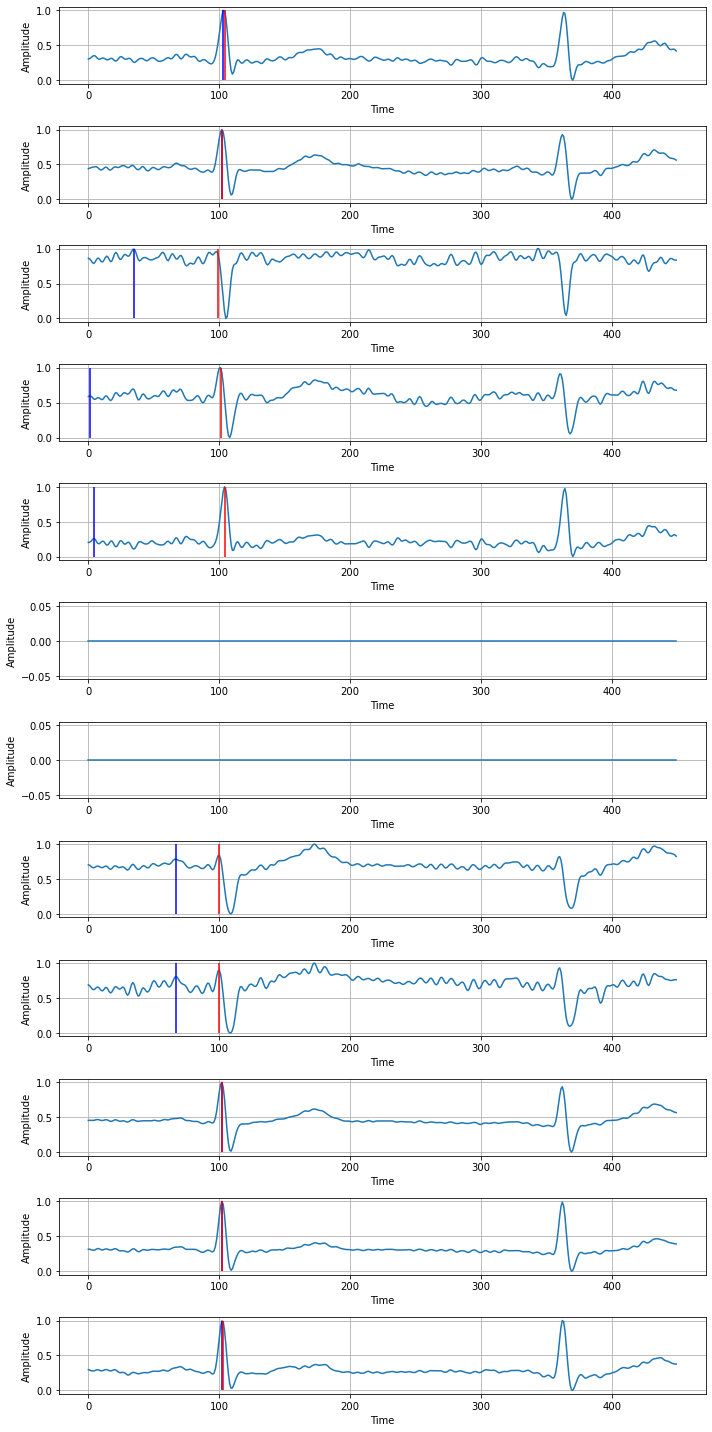

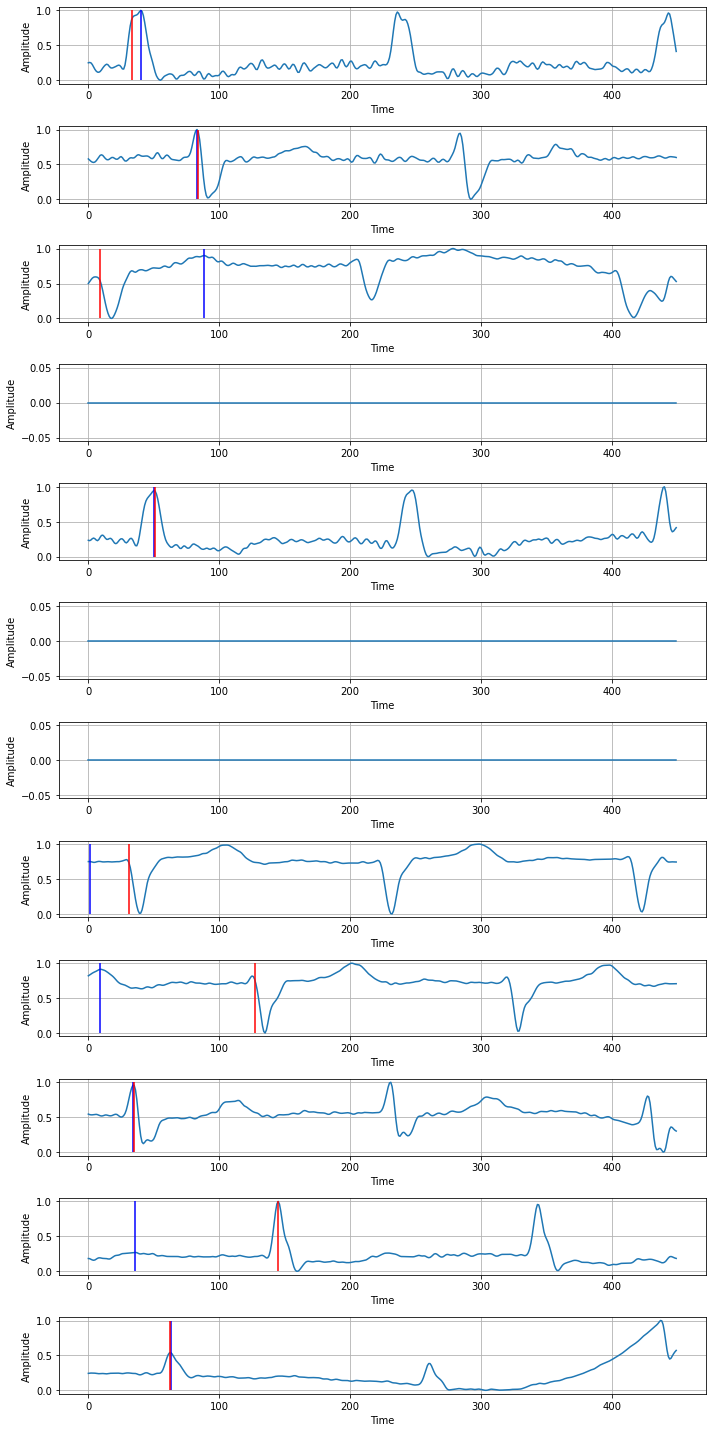

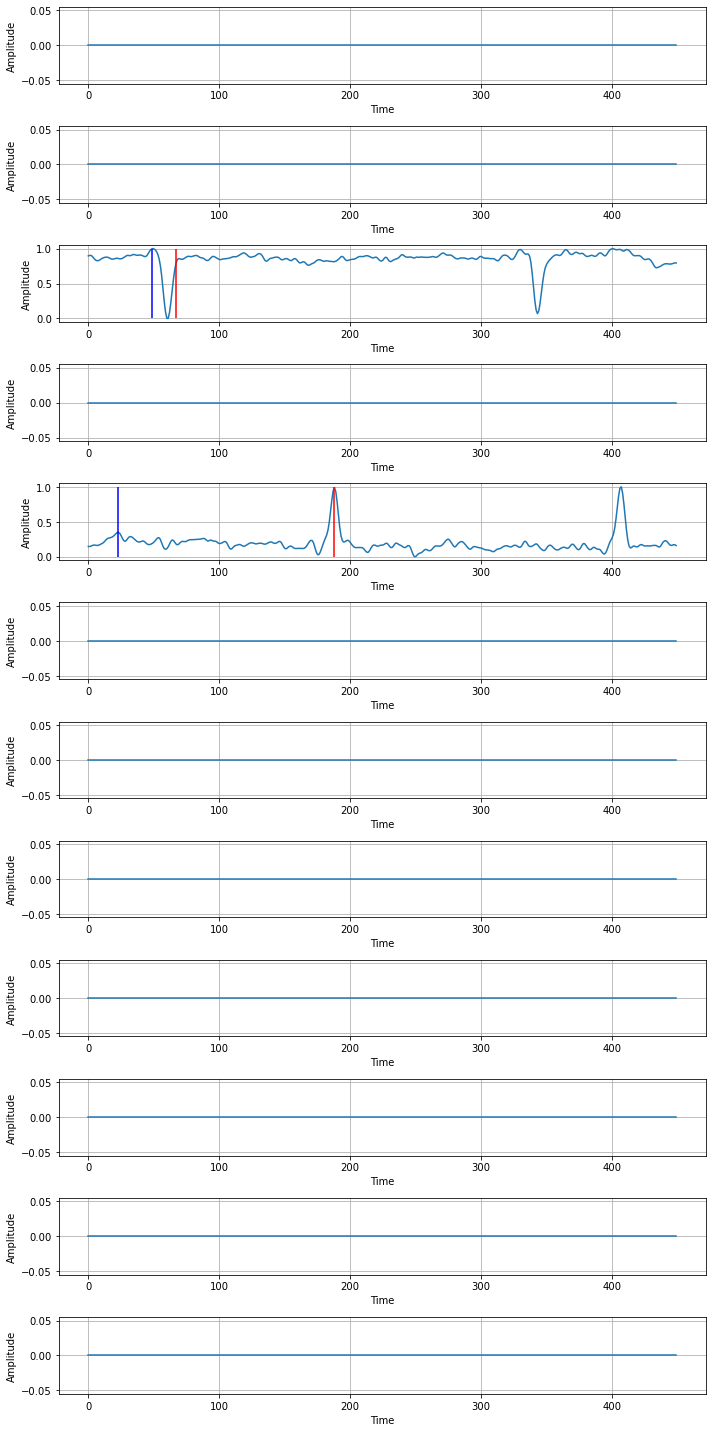

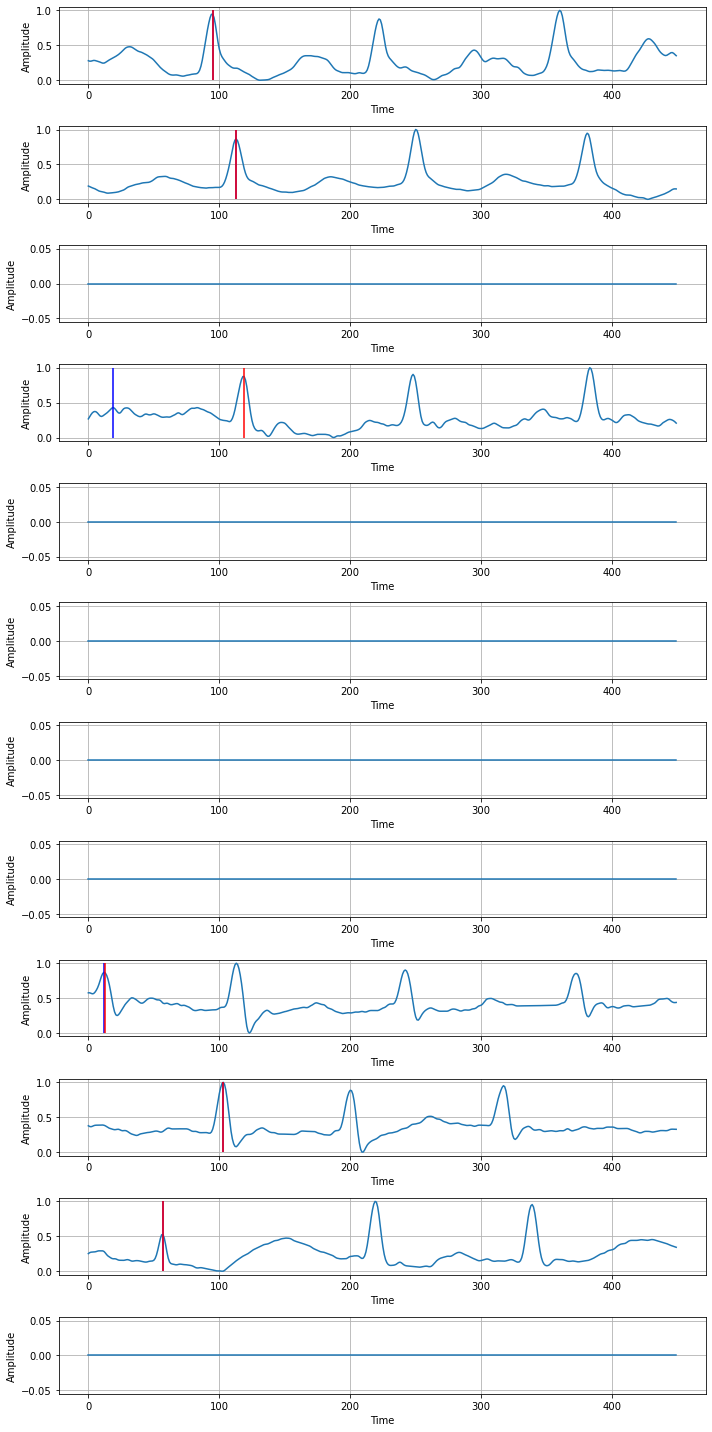

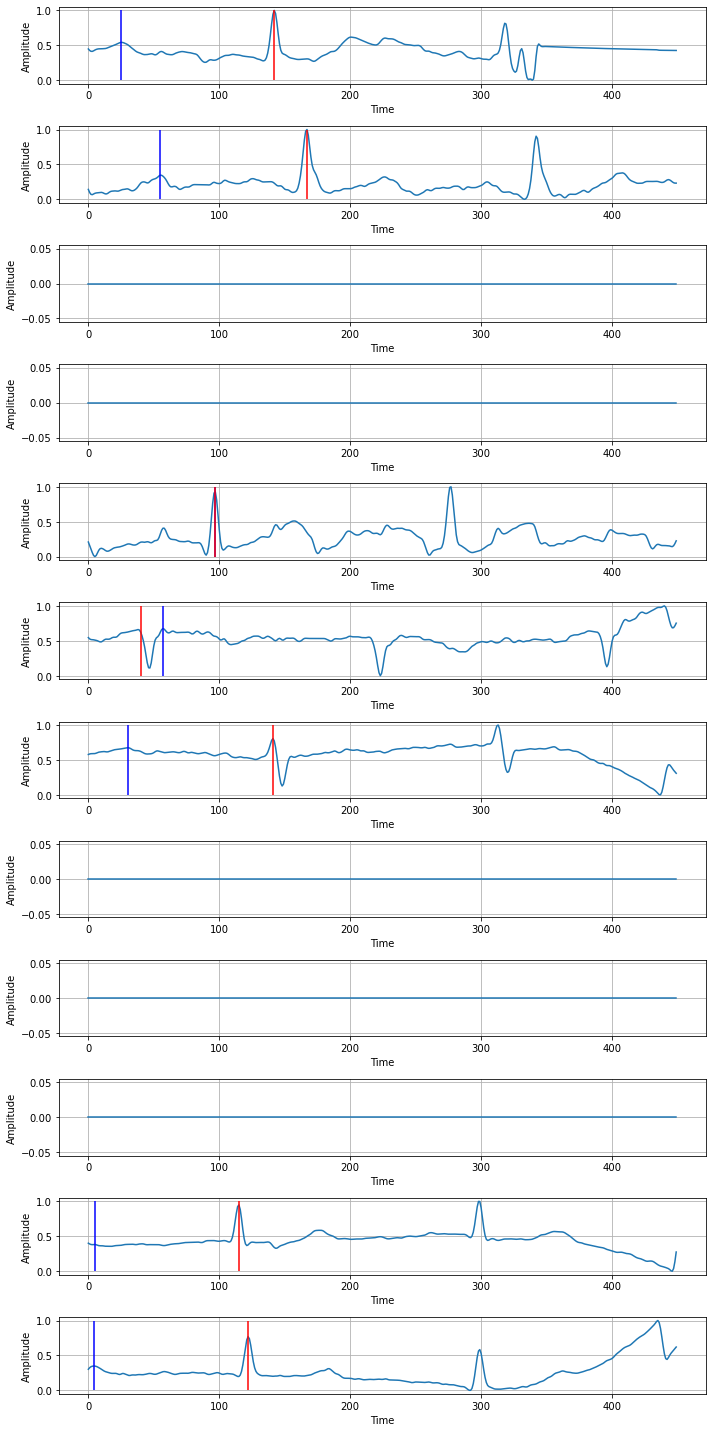

In [37]:
num_signals = 12

for signal_name in signals[:5]:
    try:
        signal = np.load(individual_signals_path+f'/{signal_name}.npy')
        signal_filled = np.nan_to_num(signal, nan = 0)
    except:
        print(f'Signal {signal_name} was not found.')
        continue
    fig, axes = plt.subplots(num_signals, 1, figsize=(10, 20))  # Adjust figure size as needed

    for i in range(num_signals):
        axes[i].plot(signal_filled[i])
        
        # other method
        first_peak_index = detect_first_r_peak(signal_filled[i])
        if first_peak_index is not None:
            axes[i].vlines(x=first_peak_index, ymin= 0, ymax = 1, color='b')

        # our method
        sig = signal_filled[i]
        try:
            axes[i].vlines(x=extract_start(sig),ymin=0,ymax=1, color='r')
        except:
            pass


        axes[i].set_xlabel("Time")
        axes[i].set_ylabel("Amplitude")
        axes[i].grid(True)

    plt.tight_layout()
    
    print('\n\n\n')


In [56]:
def register_all_peaks_to_minimal_peak(signal):
    # get peaks
    first_r_peaks_locations=[]
    for jj in range(len(signal)):
        try:
            first_r_peaks_locations.append(extract_start(signal[jj]))
        except:
            first_r_peaks_locations.append(450)
    # register signal
    registered_signal = []
    first_r_appearence_over_channels = min(first_r_peaks_locations)
    # first_r_peaks_locations = [0 if x==450 else x for x in first_r_peaks_locations]
    moving_to_first_appearence = [x-first_r_appearence_over_channels for x in first_r_peaks_locations]
    # print('first_r_peaks_locations', first_r_peaks_locations)
    # print('moving_to_first_appearence', moving_to_first_appearence)
    
    for jj in range(len(signal)):
        channel_registered = np.concatenate((signal[jj][moving_to_first_appearence[jj]:], np.repeat(0,moving_to_first_appearence[jj])), axis=0)
        registered_signal.append(channel_registered)

    registered_signal = np.array(registered_signal)
    return registered_signal


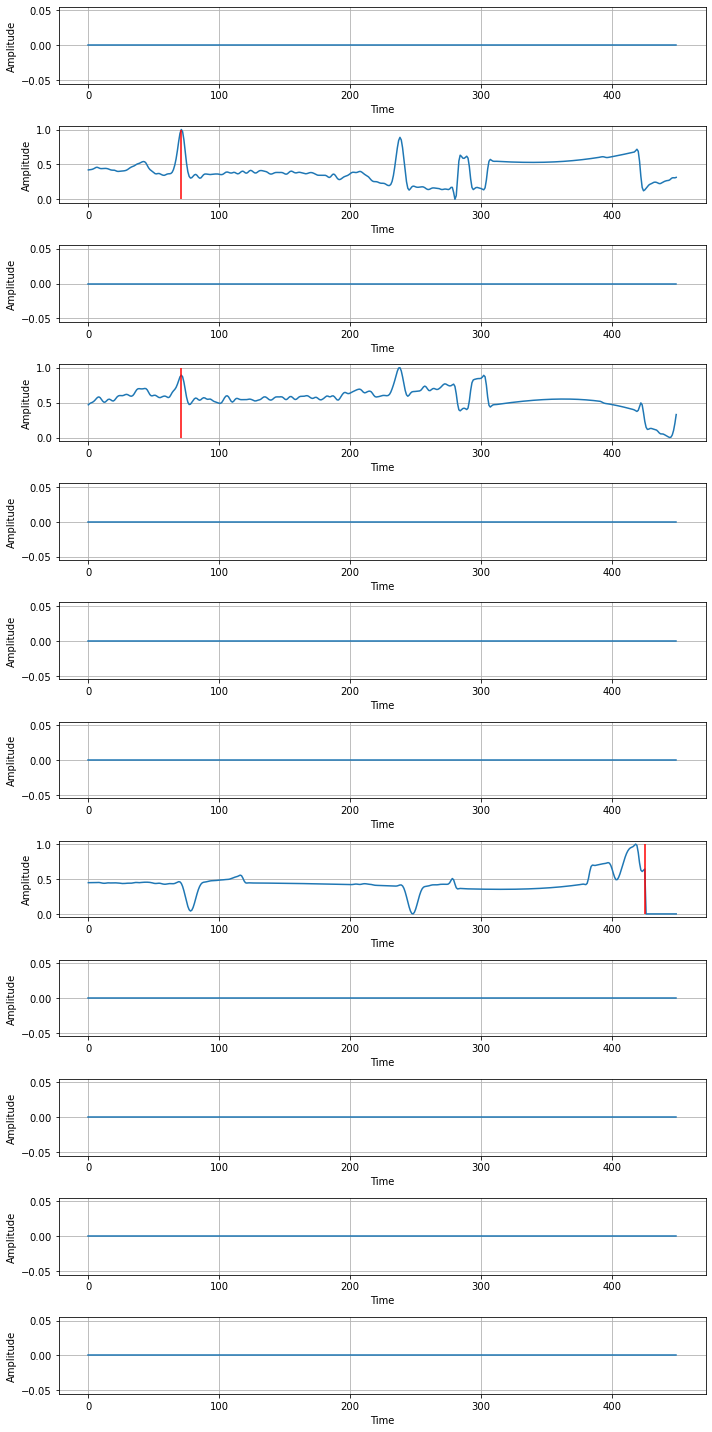

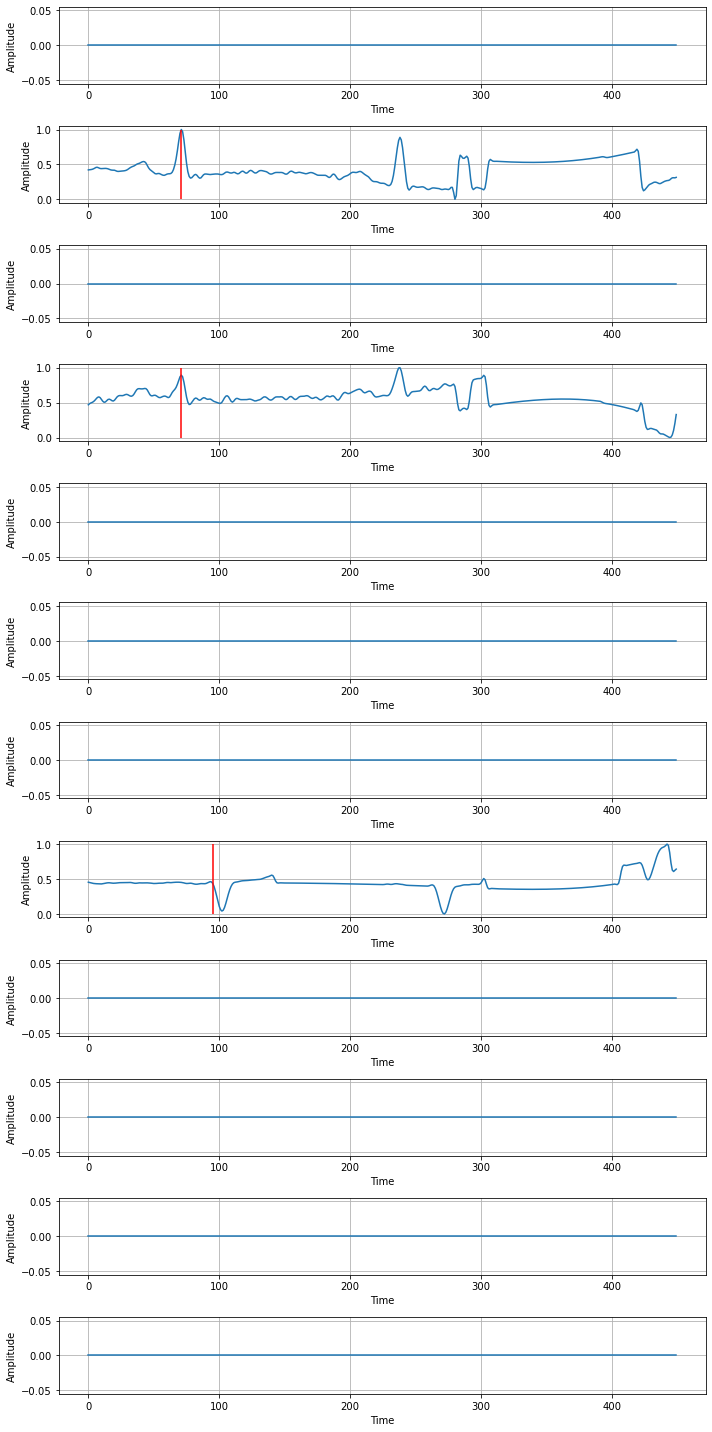

In [77]:
signal = np.load(individual_signals_path+f'/{signals[33]}.npy')
signal_filled = np.nan_to_num(signal, nan = 0)

registered_signal = register_all_peaks_to_minimal_peak(signal_filled)


num_signals = 12
fig, axes = plt.subplots(num_signals, 1, figsize=(10, 20))  # Adjust figure size as needed

for i in range(num_signals):
    axes[i].plot(registered_signal[i])
    
    # our method
    sig = registered_signal[i]
    try:
        axes[i].vlines(x=extract_start(sig),ymin=0,ymax=1, color='r')
    except:
        pass


    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")
    axes[i].grid(True)


plt.tight_layout()
plt.show()
print('\n\n\n')


fig, axes = plt.subplots(num_signals, 1, figsize=(10, 20))  # Adjust figure size as needed
for i in range(num_signals):
    axes[i].plot(signal_filled[i])
    
    # our method
    sig = signal_filled[i]
    try:
        axes[i].vlines(x=extract_start(sig),ymin=0,ymax=1, color='r')
    except:
        pass


    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")
    axes[i].grid(True)


plt.tight_layout()
plt.show()




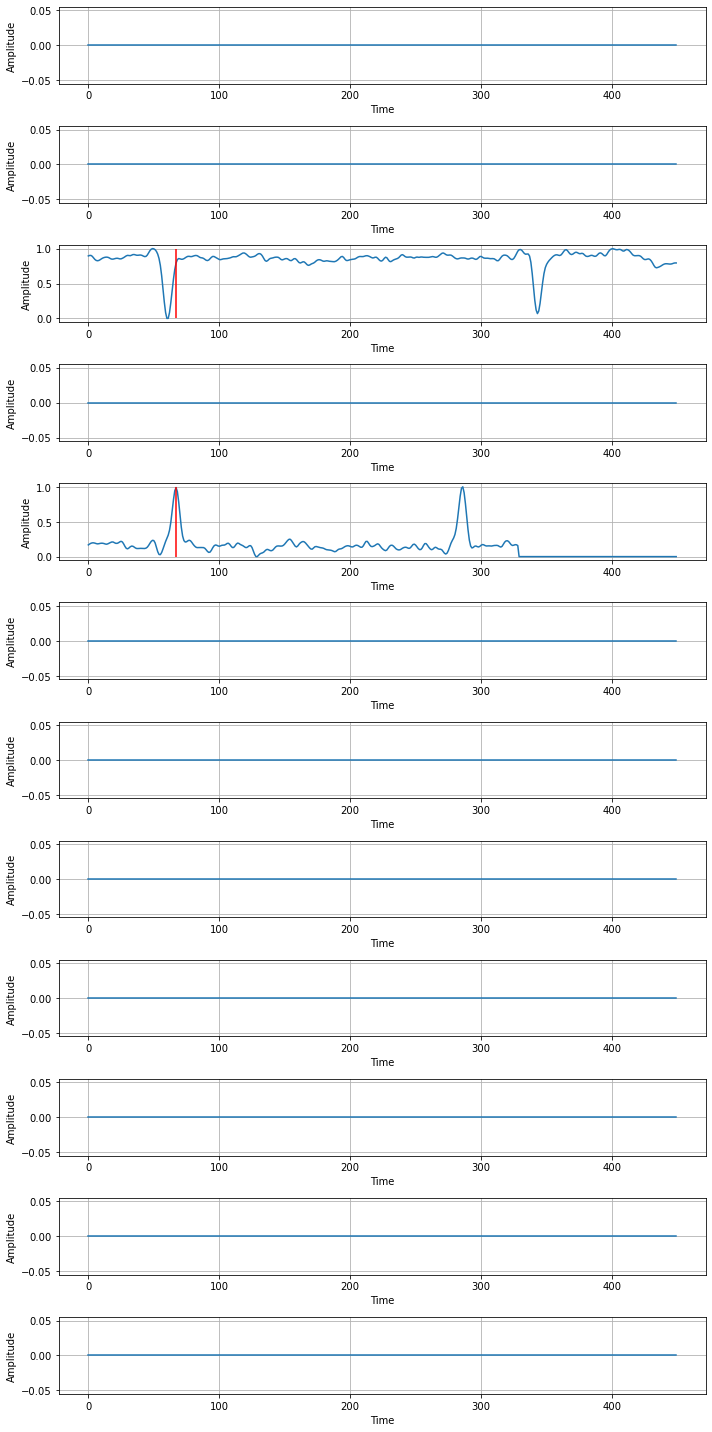

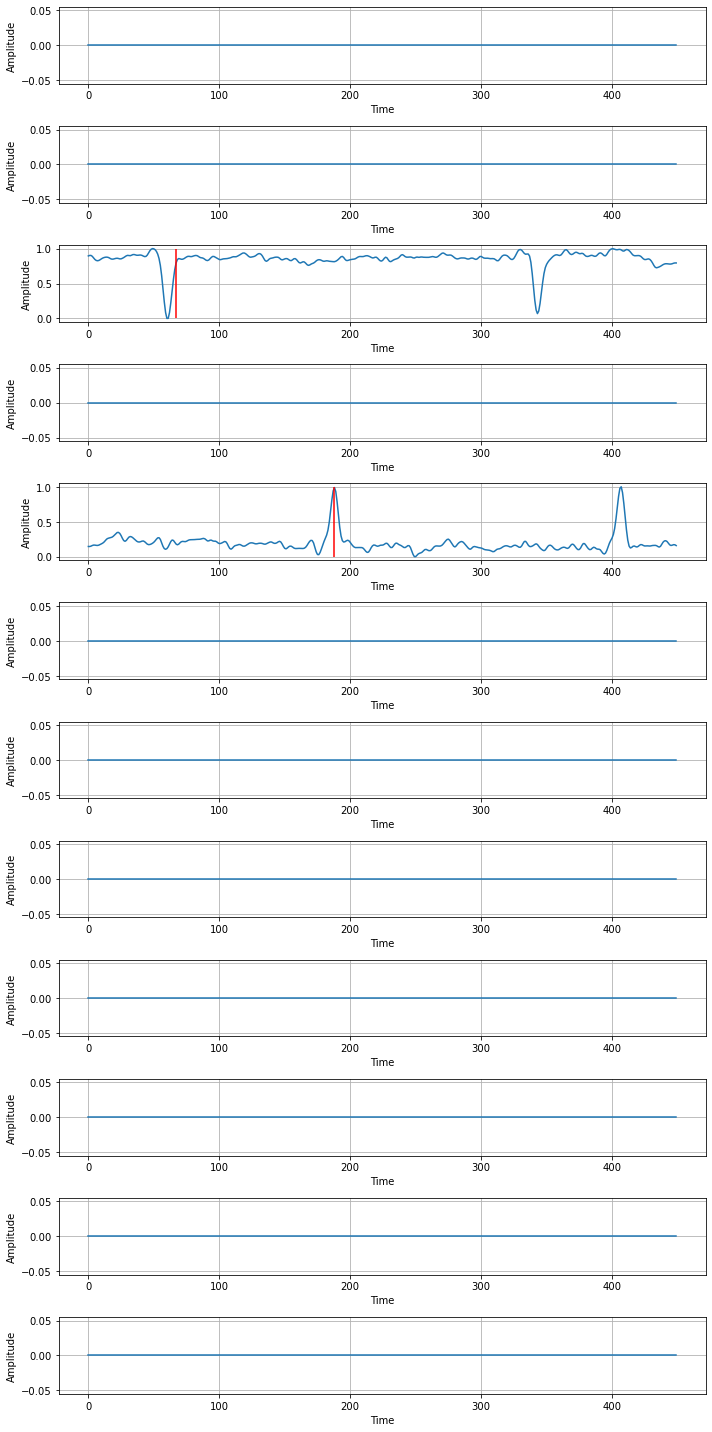

In [64]:
signal = np.load(individual_signals_path+f'/{signals[2]}.npy')
signal_filled = np.nan_to_num(signal, nan = 0)

registered_signal = register_all_peaks_to_minimal_peak(signal_filled)


num_signals = 12
fig, axes = plt.subplots(num_signals, 1, figsize=(10, 20))  # Adjust figure size as needed

for i in range(num_signals):
    axes[i].plot(registered_signal[i])
    
    # our method
    sig = registered_signal[i]
    try:
        axes[i].vlines(x=extract_start(sig),ymin=0,ymax=1, color='r')
    except:
        pass


    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")
    axes[i].grid(True)


plt.tight_layout()
plt.show()
print('\n\n\n')


fig, axes = plt.subplots(num_signals, 1, figsize=(10, 20))  # Adjust figure size as needed
for i in range(num_signals):
    axes[i].plot(signal_filled[i])
    
    # our method
    sig = signal_filled[i]
    try:
        axes[i].vlines(x=extract_start(sig),ymin=0,ymax=1, color='r')
    except:
        pass


    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")
    axes[i].grid(True)


plt.tight_layout()
plt.show()




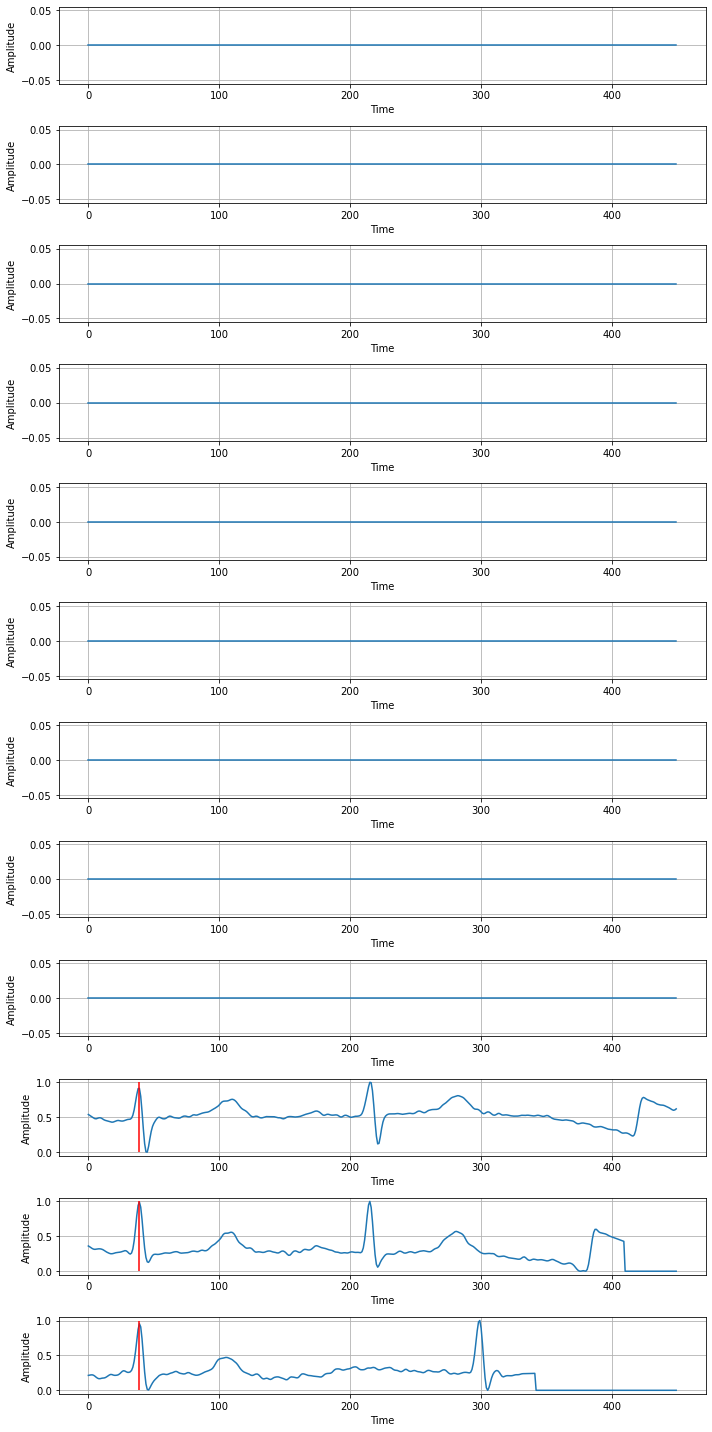

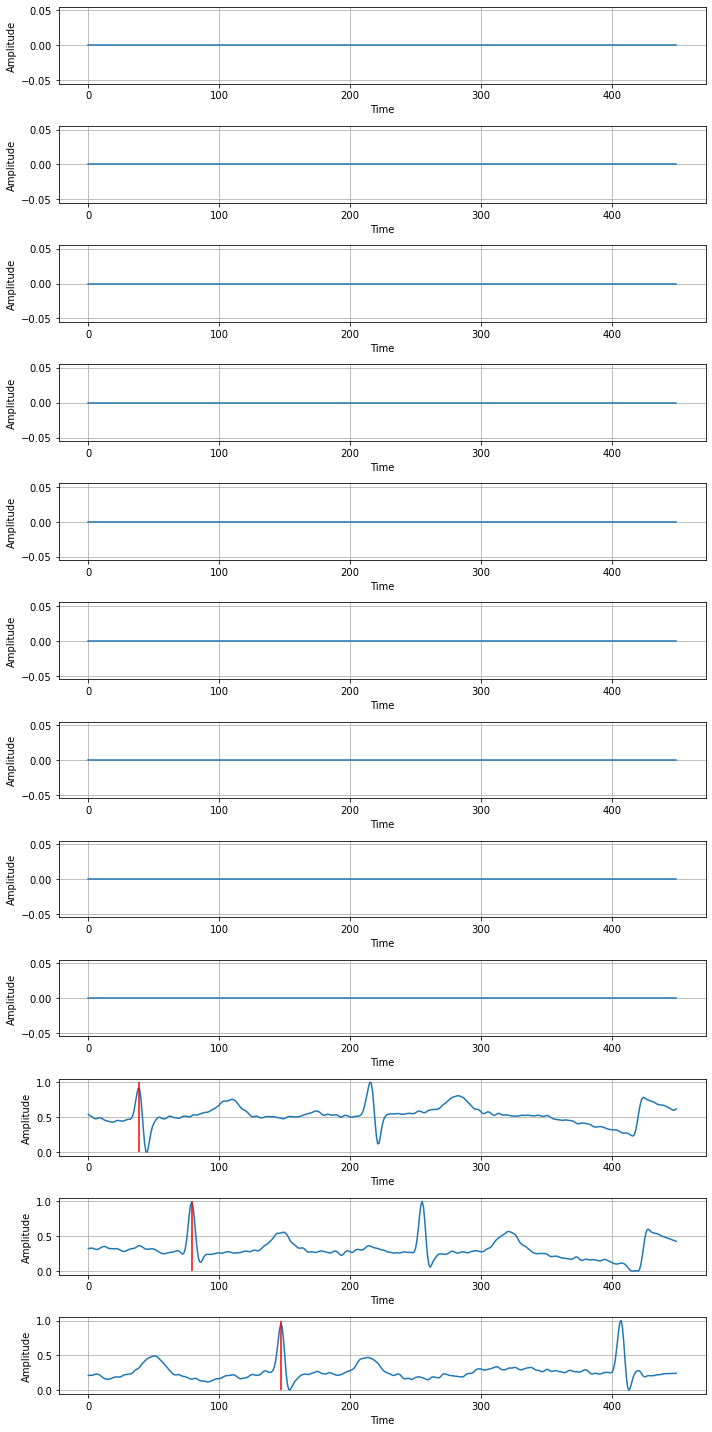

In [78]:
signal = np.load(individual_signals_path+f'/202504.npy')
signal_filled = np.nan_to_num(signal, nan = 0)

registered_signal = register_all_peaks_to_minimal_peak(signal_filled)


num_signals = 12
fig, axes = plt.subplots(num_signals, 1, figsize=(10, 20))  # Adjust figure size as needed

for i in range(num_signals):
    axes[i].plot(registered_signal[i])
    
    # our method
    sig = registered_signal[i]
    try:
        axes[i].vlines(x=extract_start(sig),ymin=0,ymax=1, color='r')
    except:
        pass


    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")
    axes[i].grid(True)


plt.tight_layout()
plt.show()
print('\n\n\n')


fig, axes = plt.subplots(num_signals, 1, figsize=(10, 20))  # Adjust figure size as needed
for i in range(num_signals):
    axes[i].plot(signal_filled[i])
    
    # our method
    sig = signal_filled[i]
    try:
        axes[i].vlines(x=extract_start(sig),ymin=0,ymax=1, color='r')
    except:
        pass


    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")
    axes[i].grid(True)


plt.tight_layout()
plt.show()


